# Проект "Аналитика благотворительного фонда АиФ Доброе сердце"

**Описание:**

Благотворительный фонд "АиФ Доброе сердце" хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить свою работу с ними. 
У фонда есть «старожилы» - доноры, которые достаточно давно с фондом и одной из задач будет изучение их поведения: активны ли они, делают ли пожертвования и как реагируют на активность фонда?  

**Цели исследования:**

- проанализировать имеющиеся данные; 
- проанализировать поведение доноров: в целом, исторических пользователей и новых пользователей отдельно; 
- составить портрет типичного пользователя: регион, поведение, др. параметры; 
- рассчитать метрики: пользовательские, маркетинговые, коммерческие;
- сегментировать пользователей: RFM-анализ, описание сегментов;
- изучить каналы привлечения пользователей и их эффективность;
- изучить эффективность рассылок.

**Задачи:**

- провести исследовательский анализ данных;
- составить RFM - анализ пользователей;
- посчитать метрики пользователей;
- формулирование выводов по полученным результатам, подготовка презентации.




**Ход исследовия:**

- прочитать данные из файла и сохранить в датафремы;
- обзор и преобработка входных данных;
- исследовательский анализ данных;
- расчет метрик;
- RFM - анализ;
- когортный анализ;
- проверка гипотез;
- формулирование выводов по полученным результатам;
- подготовка презентацииации.

## Описание данных

**Файл** `id_donor.csv` - информация о донорах:

- `CustomerCustomFieldsRecurrent` - рекуррент да / нет;
- `CustomerCustomFieldsVolunteer` - волонтер да / нет;
- `CustomerSex` - пол пользователя;
- `CustomerAreaIdsExternalId` - идентификатор региона пользователя;
- `CustomerAreaName` - название региона пользователя;
- `CustomerIanaTimeZone` - часовой пояс пользователя;
- `CustomerTimeZoneSource` - источник данных о часовом поясе;
- `CustomerIdsMindboxId` - идентификатор пользователя;
- `CustomerIsEmailInvalid` - почта невалидна да / нет;
- `CustomerChangeDateTimeUtc` - дата регистрации / редактирования;
- `CustomerCustomerSubscriptions DobroaifIsSubscribed` - подписка;
- `CustomerCustomerSubscriptions DobroaifSmsIsSubscribed` - подписка в точке контакта SMS;
- `CustomerCustomerSubscriptions DobroaifEmailIsSubscribed` - подписка в точке контакта email;
- `CustomerCustomerSubscriptions DobroaifViberIsSubscribed` - подписка в точке контакта Viber;
- `CustomerCustomerSubscriptions DobroaifMobilePushIsSubscribed` - подписка в точке контакта Mobile Push;
- `CustomerCustomerSubscriptions DobroaifWebPushIsSubscribed` - подписка в точке контакта Web Push.

 
**Файл** `order.csv` - информация о пожертвованиях:

- `OrderIdsMindboxId` - идентификатор платежа;
- `OrderFirstActionIdsMindboxId` - идентификатор действия;
- `OrderFirstActionDateTimeUtc` - дата и время оформления заказа;
- `OrderFirstActionChannelIdsMindboxId` - идентификатор точки контакта;
- `OrderFirstActionChannelIdsExternalId` - внешний идентификатор точки контакта;
- `OrderFirstActionChannelName` - наименование точки контакта;
- `OrderAreaIdsExternalId` - идентификатор региона пользователя;
- `OrderTransactionIdsExternalId` - внешний идентификатор транзакции;
- `OrderTotalPrice` - стоимость заказа;
- `OrderIdsWebsiteID` - идентификатор заказа на сайте;
- `OrderCustomFieldsNewyear` - наличие поля с новым годом;
- `OrderCustomFieldsNextPayDate` - дата следующего списания денег;
- `OrderCustomFieldsRecurrent` - рекурент да / нет;
- `OrderCustomFieldsRepayment` - повторный платеж;
- `OrderLineProductIdsWebsite` - идентификатор продукта на сайте;
- `OrderLineProductName` - название продукта;
- `OrderLineQuantity` - количество единиц продукта;
- `OrderLineBasePricePerItem` - базовая цена за единицу продукта;
- `OrderLinePriceOfLine` - итоговая цена;
- `OrderLineStatusIdsExternalId` - идентификатор статуса позиции заказа;
- `OrderCustomerIdsMindboxId` - идентификатор пользователя.


**Файл** `import.csv` - информация об историческом импорте:

- `CustomerActionCustomerIdsMindboxId` - идентификатор пользователя.


**Файл** `channels.pkl` - информация о каналах привлечения:

- `User_action` - название действия пользователя;
- `Action_date` - дата действия пользователя;
- `Channel_id` - идентификатор канала (описание в текстовом файле);
- `Utm_campaign` - кампания;
- `Utm_source` - ресурс;
- `Utm_medium` - что-то дублирующееся;
- `User_id` - идентификатор пользователя;
- `Action_time` - час действия пользователя.

 


## Настройка рабочей среды

In [1]:
# Подгрузка модулей
import json
import math
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import seaborn as sns

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import gridspec
from matplotlib import pyplot as plt

from operator import attrgetter

from ydata_profiling import ProfileReport


## Глобальные переменные

In [2]:
path_dir = 'datasets/'

start_date = datetime.strptime('2024-03-19', '%Y-%m-%d')

# Уровень статистической значимости
alpha = 0.05

# момент анализа
observation_date = start_date.date()
# горизонт анализа
horizon_months = 14  


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = None
pd.set_option('future.no_silent_downcasting', True)

dict_day_of_week = {
    0: 'пн', 
    1: 'вт', 
    2: 'ср', 
    3: 'чт', 
    4: 'пт', 
    5: 'сб', 
    6: 'вс'
}

dict_part_of_day = {
    0: 'ночь - 0:00-6:00', 
    1: 'утро - 6:00-12:00', 
    2: 'день - 12:00-18:00', 
    3: 'вечер - 18:00-24:00', 
}


In [3]:
# Данные для RFM - анализа
rfm_data = pd.DataFrame(
    {
        'RFM': [
            '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213',
            '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323',
            '331', '332', '333'
        ],
        'Определение сегмента': [
            'Недавно покупавшие частые с высоким чеком', 'Недавно покупавшие частые со средним чеком', 
            'Недавно покупавшие частые с низким чеком', 'Недавно покупавшие редкие с высоким чеком', 
            'Недавно покупавшие редкие со средним чеком', 'Недавно покупавшие редкие с низким чеком', 
            'Недавно покупавшие разовые с высоким чеком', 'Недавно покупавшие разовые со средним чеком', 
            'Недавно покупавшие разовые с низким чеком', 'Спящие частые с высоким чеком', 
            'Спящие частые со средним чеком', 'Спящие частые с низким чеком', 
            'Спящие редкие с высоким чеком', 'Спящие редкие со средним чеком', 
            'Спящие редкие с низким чеком', 'Спящие разовые с высоким чеком', 
            'Спящие разовые со средним чеком', 'Спящие разовые с низким чеком', 
            'Давние частые с высоким чеком', 'Давние частые со средним чеком', 
            'Давние частые с низким чеком', 'Давние редкие с высоким чеком', 
            'Давние редкие со средним чеком', 'Давние редкие с низким чеком', 
            'Давние разовые с высоким чеком', 'Давние разовые со средним чеком', 
            'Давние разовые с низким чеком'
        ],
        'Определение группы': [
            'VIP', 'Выгодные', 'Выгодные', 'Потенциально выгодные', 'Потенциально выгодные', 'Новенькие', 
            'Новенькие', 'Новенькие', 'Новенькие', 'Спящие выгодные', 'Спящие выгодные', 'Спящие выгодные', 
            'Спящие выгодные', 'Спящие выгодные', 'Спящие', 'Спящие', 'Спящие', 'Спящие', 'Уходящие выгодные', 
            'Уходящие выгодные', 'Уходящие', 'Уходящие', 'Уходящие', 'Потерянные', 'Потерянные', 
            'Потерянные', 'Потерянные'
        ]
    }
)

## Функции

### Функции предварительно обработки данных

#### Функция df_analysis()

Функция для предварительного общего анализа датафрейма.

In [4]:
# Функция для предварительного общего анализа датафрейма
def df_analysis(df):

    # Отображение датафрейма df
    display(df.head())
    print('*'*100)

    # Вывод основной информации о датафрейме df с помощью метода info().
    display(df.info())
    print('*'*100)

    # Проверка количества пропусков в датафрейме  df
    isna = df.isna().sum().reset_index(name='cnt').query('cnt > 0')
    if isna.shape[0] == 0:
        print('Пропусков в датафрейме нет.')  
    else:
        print('Пропуски в датафрейме:')  
        display(isna)
    print('*'*100)
    
    # Проверка количества дубликатов в датафрейме  df
    duplicated = df.duplicated().sum()
    print('Количество дубликатов в датафрейме: {}'.format(duplicated), end='')
    # Подсчет процента дубликатов в датафрейме df
    print(' ({:.2%} от общего количества записей).'.format(duplicated/df.shape[0]))    
    print('*'*100)


#### Функция df_column_astype()

Функция для преобразования типа данных у списка столбцов.

In [5]:
def df_column_astype(df, change_type):

    for column in change_type:
        df[column] = df[column].astype(change_type[column])


####  Функция df_describe_by_parameter()

Функция для получения статистических характеристик по столбцу

In [6]:
def df_describe_by_parameter(df, column):

    cnt = int((df[column].describe())['count'])
    q1 = round((df[column].describe())['25%'], 2)
    q3 = round((df[column].describe())['75%'], 2)
    mean = round((df[column].describe())['mean'], 2)
    median = round((df[column].describe())['50%'], 2)
    q_min = round((df[column].describe())['min'], 2)
    q_max = round((df[column].describe())['max'], 2)

    print('Всего значений: {0}'.format(cnt))
    print()
    print('Среднее арифметическое значение: {0}'.format(mean))
    print('Медианное значение: {0}'.format(median))
    print('В среднем значения варьируются от {0} до {1}'.format(q1, q3))
    print('Минимальное значение {0}'.format(q_min))   
    print('Максимальное значение {0}'.format(q_max))        

#### Функция df_duplicated_info()

Функция для поиска статистики по дубликатам в датафрейме.

In [7]:
def df_duplicated_info(df):
    # Проверка количества дубликатов в датафрейме  df
    cnt = df.duplicated().sum()

    print('Количество дубликатов в датафрейме: {0}'.format(cnt), end='')

    # Подсчет процента дубликатов в датафрейме df
    print(' ({:.2%} от общего количества записей).'.format(cnt/df.shape[0]))    

#### Функция df_isna_info()

Функция для поиска статистики по пропускам в датафрейме.

In [8]:
def df_isna_info(df):
    # Проверка количества пропусков в датафрейме  df
    isna = df.isna().sum().reset_index(name='cnt').query('cnt > 0')
    isna['percent'] = ((isna['cnt'] / len(df)) * 100).map(lambda x: f"{x:.2f}%")
    
    if isna.shape[0] == 0:
        print('Пропусков в датафрейме нет.')  
    else:
        print('Пропуски в датафрейме:')  
        display(isna)

#### Функция read_csv_file()

In [9]:
def read_csv_file(file_name):
    # Чтение только заголовков
    headers = pd.read_csv(file_name, encoding='cp1251', sep=';', nrows=0).columns
    
    # Обработка названий столбцов: удаление всего после знака " ="
    cleaned_headers = [h.split(' =')[0].strip() for h in headers]
    
    # Загрузка данных с обновлёнными названиями столбцов
    return pd.read_csv(file_name, encoding='cp1251', sep=';', names=cleaned_headers, header=0, low_memory=False)


#### Функция read_json_file()

In [10]:
def read_json_file(file_name):
    # Чтение содержимого файла
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.read().replace("'", '"')

    # Загрузка JSON и преобразование ключей в числа
    data = json.loads(file_content, object_pairs_hook=lambda x: {int(k): v for k, v in x})
    
    return data


#### Функция rank_value()



In [11]:
def rank_value(df, column):
    
    q1 = (df[column].describe())['25%']
    q3 = (df[column].describe())['75%']
    
    # Верхняя граница "усов" размаха
    iqr_mx = round(q3 + 1.5 * (q3 - q1), 2)

    bins = [0] + list(np.percentile(df.loc[df[column] < iqr_mx][column], [33, 66])) + [df[column].max()]
    print('Разбиение клиентов на 3 сегмента по значению "{}": '.format(column), end='')

    print(bins)
    
    return bins

#### Функция get_part_of_day()

In [12]:
# Функция для определения части суток
def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 0
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    else:
        return 3

#### Функция replace_sex()

In [13]:
def replace_sex(value):
    if value == 'female':
        return 'Ж'
    elif value == 'male':
        return 'М'
    elif pd.isna(value):
        return 'неизвестно'
    else:
        return value



#### Функция replace_bool()

In [14]:
def replace_bool(value):
    if value == False:
        return 'Нет'
    elif value == True:
        return 'Да'
    elif pd.isna(value):
        return 'неизвестно'
    else:
        return value


#### Функция check_ttest_ind

In [15]:
def check_ttest_ind(df1, df2, column, alternative):

    results = stats.ttest_ind(df1[column], df2[column], alternative=alternative, equal_var=False)
    
    print(f'p-value: {results.pvalue}')
    
    # проверяем p-value
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу')

In [16]:
def transliterate(name):
    cyrillic_to_latin = {
        'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ё': 'e', 'ж': 'zh',
        'з': 'z', 'и': 'i', 'й': 'j', 'к': 'k', 'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o',
        'п': 'p', 'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 'ф': 'f', 'х': 'kh', 'ц': 'ts',
        'ч': 'ch', 'ш': 'sh', 'щ': 'shch', 'ы': 'y', 'э': 'e', 'ю': 'yu', 'я': 'ya', 'ь' : ''
    }
    transliterated_name = ''.join(cyrillic_to_latin.get(char, char) for char in name)
    return transliterated_name

def put_campaing_name(input_string):
    # Шаблон для удаления конструкции
    pattern = r'Пожертвование\s+Благотворительный\s+фонд\s+«АиФ\.\s+Доброе сердце»\s+'
    
    # Замена шаблонной части строки на пустую строку
    cleaned_string = re.sub(pattern, '', input_string)
    
    # Проверка, выглядит ли строка как "Имя Фамилия"
    if re.match(r'^[А-ЯЁ][а-яё]+\s[А-ЯЁ][а-яё]+$', cleaned_string):
        # Преобразование строки в транслит
        transliterated_string = transliterate(cleaned_string.lower())
        # Замена пробелов на дефисы
        transliterated_string = transliterated_string.replace(' ', '-')
        return transliterated_string
    
    return cleaned_string



In [17]:
# Функция для проверки, является ли строка транслитом "имя-фамилия"
def is_translit_name(name):
    pattern = r'^[a-z]+-[a-z]+$'
    return re.match(pattern, name) is not None


### Функции для графического отображения информации

#### Функция draw_bar()

Функция для построения столбчатой диаграммы

In [18]:
# Функция для построения столбчатой диаграммы
def draw_bar(df, x, y, title, xlabel, ylabel='Количество значений'):

    # Простроение графика
    ax = df.plot(
        kind='bar', 
        x=x,
        y=y,
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        figsize=(10,5),
        grid=True, 
        legend = False,
    )

    # Добавляем значения внутри столбцов
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points'
        )
            
    # Вывод графика
    plt.show()
        

In [19]:
# Функция для построения столбчатой диаграммы
def draw_bar_normalize(df, x, y, title, xlabel, ylabel, horizontal=False):
    kind = 'barh' if horizontal else 'bar'

    # Построение графика
    ax = df.plot(
        kind=kind, 
        x=x,
        y=y,
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        figsize=(10, 5),
        grid=True, 
        legend=False,
    )

    # Добавляем значения внутри столбцов
    for p in ax.patches:
        if horizontal:
            ax.annotate(
                f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', 
                va='center', 
                xytext=(5, 0), 
                textcoords='offset points'
            )
        else:
            ax.annotate(
                f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', 
                va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points'
            )

    # Вывод графика
    plt.show()

In [20]:
# Функция для горизонтальной столбчатой диаграммы
def draw_bar_horizontal(df, x, y, title, xlabel, ylabel, type=''):

    df = df.sort_values(by=y)
    
    # Построение графика
    ax = df.plot(
        kind='barh', 
        x=x,
        y=y,
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        figsize=(10, 5),
        grid=True, 
        legend=False,
    )

    # Добавляем значения внутри столбцов
    for p in ax.patches:
        
        get_width = str(p.get_width()) if type == '' else f'{p.get_width():.2f}%'
            
        ax.annotate(
            get_width, 
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', 
            va='center', 
            xytext=(5, 0), 
            textcoords='offset points'
        )

    # Вывод графика
    plt.show()

In [21]:
# Функция для построения столбчатой диаграммы
def draw_bar_top(df, column, title, xlabel, ylabel='Количество значений'):

    tmp_df = df[column].value_counts().reset_index(name='cnd')
    
    # Простроение графика
    ax = tmp_df.plot(
        kind='bar', 
        x=column,
        y='cnd',
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        figsize=(10,5),
        grid=True, 
        legend = False,
    )

    # Добавляем значения внутри столбцов
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points'
        )
            
    # Вывод графика
    plt.show()
        

#### Функция draw_bar_сompare()

In [22]:
# Функция для построения столбчатой диаграммы
def draw_bar_сompare(df, title_name, x_name, y_name):
    ax = df.plot(
            kind='bar', 
            title=title_name, 
            xlabel=x_name, 
            ylabel=y_name, 
            figsize=(10,5),
            grid=True, 
        )

    # Удаление заголовка у легенды
    ax.legend(title='')
    plt.show()   

#### Функция draw_bar_relative()

Функция для построения столбчатой диаграммы с относительными значениями (в процентах) 

In [23]:
# Функция для построения столбчатой диаграммы
def draw_bar_relative(df, column, title, xlabel, ylabel):

    data = (
        df[column]
        .value_counts(normalize=True)
        .reset_index(name='cnt')
        .set_index(column)
        .sort_values(by='cnt', ascending=False)
    )
    
    if column in dictionary:
        data.index = data.index.map(dictionary[column])

    # Простроение графика
    ax = data.plot(
        kind='bar', 
        y='cnt',
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        figsize=(10,5),
        grid=True, 
        legend = False,
    )

    # Аннотация, значения внутри столбцов
    for p in ax.patches:
        ax.annotate(
            "{:.2f}%".format(p.get_height() * 100), 
            (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points'
        )
            
    # Вывод графика
    plt.show()

#### Функция draw_bar_by_pivot()

Функция для построения столбчатой диаграммы по нескольким полям сразу.

In [24]:
def draw_bar_by_pivot(df, title, xlable, ylable):
    

    pivot_table = pd.pivot_table(
        (
            df
            .melt(var_name='subscription_type', value_name='status')
        ), 
        index='subscription_type', 
        columns='status', 
        aggfunc=len, 
        fill_value=0
    )
    display(pivot_table)

    # Простроение графика
    pivot_table.plot(kind='bar', stacked=False, figsize=(10,5))

    # Оформление графика
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(labels=pivot_table.columns.tolist())

    # Вывод графика
    plt.show()

#### Функция draw_box()

Функция для построения диаграммы размаха.

In [25]:
# Функция для построения диаграммы размаха
def draw_box(df, x, title, x1_lim=0, x2_lim=0):

    # Размер графика
    plt.figure(figsize=(10, 2))
    
    # Простроение графика
    sns.boxplot(x=x, data=df, orient='h')
    plt.yticks([])

    # Оформление графика
    plt.suptitle(title)
    plt.xlabel('Значение параметра')
    
    # Установка пределов для оси X, если они заданы
    if x1_lim != 0 or x2_lim != 0:
        plt.xlim(x1_lim, x2_lim)

    # Вывод графика
    plt.show()

    df_describe_by_parameter(df, x)


In [26]:
# Функция для построения диаграммы размаха
def draw_box_2(df, x, y='', x1_lim=0, x2_lim=0):

    # Размер графика
    plt.figure(figsize=(10, 2))
    
    # Простроение графика
    if y == '':
        sns.boxplot(x=x, data=df, orient='h')
        plt.yticks([])
    else:
        sns.boxplot(x=x, y=y, data=df, orient='h') 
        
        current_ticks = plt.yticks()[0]  
        current_labels = [dictionary['company_is_active'].get(item.get_text() == 'True', item.get_text()) for item in plt.gca().get_yticklabels()]
        plt.yticks(ticks=current_ticks, labels=current_labels)

    # Оформление графика
    plt.suptitle('Диаграммы размаха по параметру "{}"'.format(x))
    plt.xlabel('Значение параметра')
    
    # Установка пределов для оси X, если они заданы
    if x1_lim != 0 or x2_lim != 0:
        plt.xlim(x1_lim, x2_lim)

    # Вывод графика
    plt.show()

#### Функция draw_heatmap()

Функция для построения heatmap.

In [27]:
# Функция для построения heatmap
def draw_heatmap(df, title, xlabel, ylable, annot=True, size_x=12, size_y=7):
    
    # Размер графика
    plt.figure(figsize = (size_x, size_y))
    
    # Простроение графика
    sns.heatmap(df, annot = annot, fmt = '.2%')

    # Оформление графика
    plt.title(title)  
    plt.xlabel(xlabel) 
    plt.ylabel(ylable) 

    # Вывод графика
    plt.show()  


#### Функция draw_hist_and_box()

Функция строит гистограмму и диаграмму размаха по заданному параметру.

In [28]:
def draw_hist_and_box(df, column, bins=100, x1_lim=0, x2_lim=0):

    # Размер графика
    plt.figure(figsize=(12, 9))
    plt.suptitle('Анализ данных по параметру "{}"'.format(column))
    
    #--------------------------------------------------------------------------------------

    # Простроение графика
    plt.subplot(2,2,1)
    sns.histplot(data=df, x=column, bins=bins, label=column)

    # Оформление графика
    plt.title('Гистограмма')
    plt.xlabel('Значение параметра')
    plt.ylabel('Количество значений')

    # Установка пределов для оси X, если они заданы
    if x1_lim != 0 or x2_lim != 0:
        plt.xlim(x1_lim, x2_lim)
    
    #--------------------------------------------------------------------------------------
    
    # Простроение графика
    plt.subplot(2,2,2)
    sns.boxplot(x=column, data=df)

    # Оформление графика
    plt.title('Диаграмма размаха')
    plt.xlabel('Значение параметра')
    plt.yticks([])

    # Установка пределов для оси X, если они заданы
    if x1_lim != 0 or x2_lim != 0:
        plt.xlim(x1_lim, x2_lim)

    # Вывод графика
    plt.show()

    df_describe_by_parameter(df, column)
   

#### Функция draw_hist_by_date()

Функция для построения нескольких гистограмм по дате на одном графике.

In [29]:
# Функция для построения нескольких гистограмм на одном графике.
def draw_hist_by_date(df, columns, title, bins=100):
    
    # Размер графика
    plt.figure(figsize=(10, 5))

    # Простроение графика
    for column in columns:
        sns.histplot(data=df, x=column, bins=bins, element='step', fill=False)

    # Оформление графика
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество значений')

    # Вывод графика
    plt.show()

In [30]:
# Функция для построения двух гистограмм на одном графике.
def draw_hist_compare(df1, column1, df2, column2, bins=100):
    
    # Размер графика
    plt.figure(figsize=(10, 5))

    # Простроение графиков
    sns.histplot(data=df1, x=column1, bins=bins, element='step', label=column1, fill=False, stat='density')
    sns.histplot(data=df2, x=column2, bins=bins, element='step', label=column2, fill=False, stat='density')

    # Оформление графика
    plt.title('Гистограмма распределения значений')
    plt.xlabel('Дата')
    plt.ylabel('Количество значений')
    plt.legend()

    # Вывод графика
    plt.show()

#### Функция draw_pie()

Функция для построения круговой диаграммы

In [31]:
# Функция для построения круговой диаграммы
def draw_pie(df, column, title):

    # Размер графика
    plt.figure(figsize=(4, 4))

    # Определение функции для отображения процента и абсолютного значения
    def func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return "{:.2f}%\n({:d})".format(pct, absolute)
    
    # Простроение графика
    plt.pie(df[column], labels=df.index, autopct=lambda pct: func(pct, df[column]))

    # Оформление графика
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(0,0))

    # Вывод графика
    plt.show()



#### draw_pie_compare()

In [32]:
# Функция для построения двух круговых диаграмм рядом для сравнение
def draw_pie_compare(df, column, filter_column, filter_value1, filter_value2, title, title1, title2):
    
    # Размер графика
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Создание двух подграфиков
    plt.suptitle(title)

    # Определение функции для отображения процента и абсолютного значения
    def func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return "{:.2f}%\n({:d})".format(pct, absolute)
    
    # Фильтрация данных
    df1 = df.query(f'{filter_column} == {filter_value1}')[column].value_counts().reset_index(name='cnt').set_index(column)
    df2 = df.query(f'{filter_column} == {filter_value2}')[column].value_counts().reset_index(name='cnt').set_index(column)

    df1.index = df1.index.map(replace_bool)
    df2.index = df2.index.map(replace_bool)
    
    # Построение первой круговой диаграммы
    axes[0].pie(df1['cnt'], labels=df1.index, autopct=lambda pct: func(pct, df1['cnt']))
    axes[0].legend(loc='upper left', bbox_to_anchor=(0, 0))
    axes[0].set_title(title1)

    # Построение второй круговой диаграммы
    axes[1].pie(df2['cnt'], labels=df2.index, autopct=lambda pct: func(pct, df2['cnt']))
    axes[1].legend(loc='upper left', bbox_to_anchor=(0, 0))
    axes[1].set_title(title2)

    # Вывод графиков
    plt.show()



#### Функция draw_plot()

Функция построения нескольких разных plot графиков на одном поле

In [33]:
def draw_plot(df, column, title, xlable, ylable):
    
    # Размер графика
    plt.figure(figsize=(10, 7))
    
    palette = sns.color_palette('hls', 15)
    # Простроение графика
    for i, field in enumerate(df.columns):
        plt.plot(df.index.to_numpy(), df[field].values, label=column, color=palette[i % len(palette)])

    # Оформление графика
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend()
    
    # Вывод графика
    plt.show()

#### Функция draw_plot_all()

Функция построения нескольких разных plot графиков отдельно по каждому полю

In [34]:
def draw_plot_all(df, data, fields, x, y, xlabel, ylabel):
    
    plt.figure(figsize=(18, 15))
    
    i = 1
    for field in fields:
    
        plt.subplot(x,y,i)
        
        # Построение графика
        plt.plot(df[data], df[field])
    
        # Оформление графика
        plt.title(parameters[field])
        plt.xlabel(parameters[data])
        plt.ylabel('Частота значений')
        
        i += 1
    
    # Отображение графика
    plt.show()
   

#### Функция draw_plot_by_pivot()

In [35]:
def draw_plot_by_pivot(df, title, xlable, ylable):
    # Построение графика
    plt.figure(figsize=(10, 7))

    # Построение линий
    for colimn in df.columns:
        plt.plot(df.index.to_numpy(), df[colimn].values, label=colimn)

    # Добавление заголовков и подписей осей
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend()

    # Показ графика
    plt.show()

#### Функция draw_funnel()



In [36]:
def draw_funnel(df, index, value, title):
    
    x_max = df.sort_values(by=value, ascending=True)[value].max()
    x_min = 0
    x_center = (x_max - x_min)/2
    
    fig, ax = plt.subplots(1, figsize=(10,2))
    
    for idx, row in df.sort_values(by=value, ascending=True).iterrows():
        
        val = row[value]
        left = (x_max - val)/2
        
        plt.barh(row[index], val, left = left, height=1, edgecolor='black')
        
        # value
        plt.text(x_center, row[index], f"{row[index]} ({val})", ha='center', color='#2A2A2A')
        
    plt.title(title)
    plt.axis('off')
    plt.show()    

In [37]:
def draw_T_plot(data, title, xlable, ylable):
    
    data.T.plot(
        grid=True,  # добавляем сетку
        xticks=list(data.columns.values),  # отметки на оси X — названия колонок
        figsize=(15, 7),  # размер графика
    )
    plt.title(title) # название графика
    plt.xlabel(xlable)  # название оси X
    plt.ylabel(ylable)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## Загрузка данных и изучение общей информации

In [38]:
# Чтение данных из csv-файлов в датафрейм и сохранение в переменные
try:
    donors = read_csv_file(path_dir + 'id_donor.csv')
    orders = read_csv_file(path_dir + 'order.csv')
    imports = read_csv_file(path_dir + 'import.csv')
    channels = pd.read_pickle(path_dir + 'channels.pkl')
    dic_channels = read_json_file(path_dir + 'channels_dict.txt')
except FileNotFoundError as e:
    print(f"FileNotFoundError successfully handled\n"
          f"{e}")

## Предварительный анализ данных

### is_donor.csv

In [39]:
#ProfileReport(donors, title="Pandas Profiling id_donor.csv", explorative=True)


### orders.csv

In [40]:
#ProfileReport(orders, title="Pandas Profiling order.csv", explorative=True)


### imports.csv

In [41]:
#ProfileReport(imports, title="Pandas Profiling import.csv", explorative=True)


### channels.pkl

In [42]:
channels['action_date'] = pd.to_datetime(channels['action_date'])

#ProfileReport(channels, title="Pandas Profiling channels.pkl", explorative=True)


## Предобработка данных


### Переименование столбцов

In [43]:
donors = donors.rename(
    columns={
        'CustomerCustomFieldsRecurrent' : 'is_recurrent',
        'CustomerCustomFieldsVolunteer' : 'is_volunteer',
        'CustomerSex' : 'sex',
        'CustomerAreaIdsExternalId' : 'region_id',
        'CustomerAreaName' : 'region_name',
        'CustomerIanaTimeZone' : 'timezone',
        'CustomerTimeZoneSource' : 'timezone_src',
        'CustomerIdsMindboxId' : 'user_id',
        'CustomerIsEmailInvalid' : 'is_valid_email',
        'CustomerChangeDateTimeUtc' : 'update_date',
        'CustomerCustomerSubscriptionsDobroaifIsSubscribed' : 'subscribed',
        'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed' : 'subscribed_sms',
        'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed' : 'subscribed_email',
        'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed' : 'subscribed_viber',
        'CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed' : 'subscribed_mobile',
        'CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed' : 'subscribed_push',
    }
)


In [44]:
orders = orders.rename(
    columns={
        'OrderIdsMindboxId' : 'order_id',
        'OrderFirstActionIdsMindboxId' : 'action_id',
        'OrderFirstActionDateTimeUtc' : 'create_date',
        'OrderFirstActionChannelIdsMindboxId' : 'contact_id',
        'OrderFirstActionChannelIdsExternalId' : 'contact_ext',
        'OrderFirstActionChannelName' : 'contact_name',
        'OrderAreaIdsExternalId' : 'region_id',
        'OrderTransactionIdsExternalId' : 'transaction_id',
        'OrderTotalPrice' : 'total_price',
        'OrderIdsWebsiteID' : 'website_id',
        'OrderCustomFieldsNewyear' : 'is_newyear',
        'OrderCustomFieldsNextPayDate' : 'next_pay_date',
        'OrderCustomFieldsRecurrent' : 'is_recurrent',
        'OrderCustomFieldsRepayment' : 'is_repayment',
        'OrderLineProductIdsWebsite' : 'product_id',
        'OrderLineProductName' : 'product_name',
        'OrderLineQuantity' : 'quantity',
        'OrderLineBasePricePerItem' : 'price_per_item',
        'OrderLinePriceOfLine' : 'price',
        'OrderLineStatusIdsExternalId' : 'status',
        'OrderCustomerIdsMindboxId' : 'user_id',
    }
)


In [45]:
imports = imports.rename(
    columns={
        'CustomerActionCustomerIdsMindboxId' : 'user_id'
    }
)


### Преобразование дат и добавление новых столбцов

In [46]:
donors['update_date'] = pd.to_datetime(donors['update_date'], dayfirst=True)
donors['update_date'] = donors['update_date'] + pd.Timedelta(hours=3)

donors['date'] = pd.to_datetime(donors['update_date'].dt.strftime('%Y-%m-%d'))
donors['month'] = pd.to_datetime(donors['update_date'].dt.strftime('%Y-%m-01'))
donors['year'] = pd.to_datetime(donors['update_date']).dt.year


In [47]:
orders['create_date'] = pd.to_datetime(orders['create_date'], dayfirst=True)
orders['create_date'] = orders['create_date'] + pd.Timedelta(hours=3)

orders['date'] = pd.to_datetime(orders['create_date'].dt.strftime('%Y-%m-%d'))
orders['month'] = pd.to_datetime(orders['create_date'].dt.strftime('%Y-%m-01'))
orders['year'] = pd.to_datetime(orders['create_date']).dt.year

orders['day_of_week'] = pd.to_datetime(orders['create_date']).dt.dayofweek
orders['part_of_day'] = orders['create_date'].dt.hour.apply(get_part_of_day)
orders['start_of_week'] = orders['date'] - pd.to_timedelta(orders['date'].dt.dayofweek, unit='d')

orders['cohort'] = orders.groupby('user_id')['create_date'].transform('min').dt.to_period('M')
orders['order_month'] = orders['date'].dt.to_period('M')



In [48]:
channels['month'] = pd.to_datetime(channels['action_date'].dt.strftime('%Y-%m-01'))
channels['year'] = pd.to_datetime(channels['action_date']).dt.year
channels['event_dt'] = pd.to_datetime(channels['action_date'].astype(str) + ' ' + channels['action_time'].astype(str).str.zfill(2) + ':00:00')


### Работа с пропусками

#### donors.csv

In [49]:
df_isna_info(donors)

Пропуски в датафрейме:


index    cnt percent
0        is_recurrent  17897  75.13%
1        is_volunteer  23814  99.97%
2                 sex   5105  21.43%
3           region_id  18776  78.82%
4         region_name  18776  78.82%
5            timezone  12197  51.20%
6        timezone_src  12197  51.20%
8      is_valid_email    424   1.78%
10         subscribed  23800  99.92%
11     subscribed_sms  23776  99.82%
12   subscribed_email    342   1.44%
13   subscribed_viber  23800  99.92%
14  subscribed_mobile  23800  99.92%
15    subscribed_push  23414  98.30%

In [50]:
donors['is_recurrent'] = donors['is_recurrent'].fillna(False)

In [51]:
donors['is_volunteer'] = donors['is_volunteer'].fillna(False)

In [52]:
donors['sex'] = donors['sex'].apply(replace_sex)

In [53]:
donors['is_valid_email'] = donors['is_valid_email'].fillna(False)

In [54]:
donors['timezone'] = donors['timezone'].fillna('')
donors['timezone_src'] = donors['timezone_src'].fillna('')

In [55]:
donors['region_id'] = donors['region_id'].fillna(0)
donors['region_name'] = donors['region_name'].fillna('')

In [56]:
donors['subscribed'] = donors['subscribed'].apply(replace_bool)
donors['subscribed_sms'] = donors['subscribed_sms'].apply(replace_bool)
donors['subscribed_email'] = donors['subscribed_email'].apply(replace_bool)
donors['subscribed_viber'] = donors['subscribed_viber'].apply(replace_bool)
donors['subscribed_mobile'] = donors['subscribed_mobile'].apply(replace_bool)
donors['subscribed_push'] = donors['subscribed_push'].apply(replace_bool)

In [57]:
df_isna_info(donors)

Пропусков в датафрейме нет.


#### orders.csv

In [58]:
df_isna_info(orders)

Пропуски в датафрейме:


index    cnt  percent
6        region_id  73763  100.00%
7   transaction_id  73763  100.00%
10      is_newyear  71882   97.45%
11   next_pay_date  73763  100.00%
12    is_recurrent  12452   16.88%
13    is_repayment  67793   91.91%
15    product_name    310    0.42%
17  price_per_item  14342   19.44%

In [59]:
orders['is_newyear'] = orders['is_newyear'].fillna(False)

In [60]:
orders['is_recurrent'] = orders['is_recurrent'].fillna(False)

In [61]:
orders['is_repayment'] = orders['is_repayment'].fillna(False)

In [62]:
orders['product_name'] = orders['product_name'].fillna('')


In [63]:
df_isna_info(orders)

Пропуски в датафрейме:


index    cnt  percent
6        region_id  73763  100.00%
7   transaction_id  73763  100.00%
11   next_pay_date  73763  100.00%
17  price_per_item  14342   19.44%

#### channels.pkl

In [64]:
df_isna_info(channels)

Пропуски в датафрейме:


index      cnt percent
3  utm_campaign  2815634  98.28%
4    utm_source  2815634  98.28%
5    utm_medium  2815634  98.28%

In [65]:
channels['utm_campaign'] = channels['utm_campaign'].fillna('')
channels['utm_source'] = channels['utm_source'].fillna('')
channels['utm_medium'] = channels['utm_medium'].fillna('')


In [66]:
df_isna_info(channels)

Пропусков в датафрейме нет.


### Удаление столбцов

In [67]:
orders['quantity'].value_counts()

quantity
1    73763
Name: count, dtype: int64

In [68]:
orders[['contact_id', 'contact_ext', 'contact_name']].value_counts()

contact_id  contact_ext    contact_name                 
9           Site           Сайт                             59453
1           Administrator  Административный сайт Mindbox    14310
Name: count, dtype: int64

In [69]:
donors = donors.drop(
    [
        'region_id', 
        'timezone_src'
    ], 
    axis=1
)


In [70]:
orders = orders.drop(
    [
        'region_id', 
        'transaction_id', 
        'next_pay_date', 
        'quantity', 
        'contact_id', 
        'contact_ext', 
        'price_per_item', 
        'price', 
        'action_id', 
        'website_id', 
        'product_id'
    ], 
    axis=1
)


In [71]:
channels = channels.drop(
    [
        'action_time'
    ], 
    axis=1
)


In [72]:
imports = imports[['user_id']]

### Преобразование типов данных

In [73]:
df_column_astype(
    donors, 
    {
        'is_recurrent' : 'bool',
        'is_volunteer' : 'bool',
        'is_valid_email' : 'bool',
    }
)

In [74]:
df_column_astype(
    orders, 
    {
        'total_price' : 'float64',
        'is_newyear' : 'bool',
        'is_recurrent' : 'bool',
        'is_repayment' : 'bool',
    }
)

### Работа с дубликатами

In [75]:
df_duplicated_info(donors)

Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).


In [76]:
df_duplicated_info(orders)

Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).


In [77]:
df_duplicated_info(channels)

Количество дубликатов в датафрейме: 224952 (7.85% от общего количества записей).


In [78]:
channels.shape[0]

2864953

In [79]:
channels = channels.drop_duplicates()
channels.shape[0]

2640001

In [80]:
df_duplicated_info(imports)

Количество дубликатов в датафрейме: 308 (4.03% от общего количества записей).


In [81]:
imports.shape[0]

7651

In [82]:
imports = imports.drop_duplicates()
imports.shape[0]

7343

### Переформирование индексов

In [83]:
donors = donors.sort_values(by=['user_id', 'update_date']).reset_index(drop=True)

In [84]:
orders = orders.sort_values(by=['user_id', 'create_date']).reset_index(drop=True)

In [85]:
channels = channels.sort_values(by=['user_id', 'event_dt']).reset_index(drop=True)

In [86]:
imports = imports.sort_values(by='user_id').reset_index(drop=True)

### Результат предобработки данных

In [87]:
df_analysis(donors)

is_recurrent  is_volunteer sex           region_name       timezone  \
0         False         False   Ж   Ульяновская область  Europe/Samara   
1         False         False   Ж  Санкт-Петербург и ЛО  Europe/Moscow   
2         False         False   Ж           Москва и МО  Europe/Moscow   
3         False         False   Ж    Ростовская область  Europe/Moscow   
4         False         False   М           Москва и МО  Europe/Moscow   

   user_id  is_valid_email         update_date  subscribed subscribed_sms  \
0     2734           False 2023-05-21 16:19:00  неизвестно     неизвестно   
1     2847           False 2023-12-24 08:41:00  неизвестно     неизвестно   
2     2861           False 2023-03-10 11:16:00  неизвестно             Да   
3     3361            True 2022-12-20 12:36:00  неизвестно     неизвестно   
4     4982           False 2023-12-18 22:43:00  неизвестно     неизвестно   

  subscribed_email subscribed_viber subscribed_mobile subscribed_push  \
0               Да       неизвестно        неизвестно      неизвестно   
1               Да       неизвестно        неизвестно      неизвестно   
2               Да       неизвестно        неизвестно      неизвестно   
3              Нет       неизвестно        неизвестно      неизвестно   
4               Да       неизвестно        неизвестно      неизвестно   

        date      month  year  
0 2023-05-21 2023-05-01  2023  
1 2023-12-24 2023-12-01  2023  
2 2023-03-10 2023-03-01  2023  
3 2022-12-20 2022-12-01  2022  
4 2023-12-18 2023-12-01  2023

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   is_recurrent       23820 non-null  bool          
 1   is_volunteer       23820 non-null  bool          
 2   sex                23820 non-null  object        
 3   region_name        23820 non-null  object        
 4   timezone           23820 non-null  object        
 5   user_id            23820 non-null  int64         
 6   is_valid_email     23820 non-null  bool          
 7   update_date        23820 non-null  datetime64[ns]
 8   subscribed         23820 non-null  object        
 9   subscribed_sms     23820 non-null  object        
 10  subscribed_email   23820 non-null  object        
 11  subscribed_viber   23820 non-null  object        
 12  subscribed_mobi

None

****************************************************************************************************
Пропусков в датафрейме нет.
****************************************************************************************************
Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).
****************************************************************************************************


In [88]:
df_analysis(orders)

order_id         create_date                   contact_name  total_price  \
0     58434 2021-03-18 13:52:00  Административный сайт Mindbox         50.0   
1     37117 2021-10-14 18:50:00  Административный сайт Mindbox          1.0   
2    102699 2022-11-23 11:42:00                           Сайт        100.0   
3     67535 2021-06-17 02:10:00  Административный сайт Mindbox        200.0   
4    111808 2023-03-29 18:15:00                           Сайт        300.0   

   is_newyear  is_recurrent  is_repayment  \
0       False         False         False   
1       False         False         False   
2       False         False         False   
3       False         False         False   
4       False         False         False   

                                                                   product_name  \
0                                                      На уставную деятельность   
1                                                      На уставную деятельность   
2  Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Игнатий Овчинников   
3                                                      На уставную деятельность   
4    Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Ратмир Шаповалов   

    status  user_id       date      month  year  day_of_week  part_of_day  \
0     Paid     2734 2021-03-18 2021-03-01  2021            3            2   
1     Paid     2734 2021-10-14 2021-10-01  2021            3            3   
2  notpaid     2734 2022-11-23 2022-11-01  2022            2            1   
3     Paid     2847 2021-06-17 2021-06-01  2021            3            0   
4     Paid     2847 2023-03-29 2023-03-01  2023            2            3   

  start_of_week   cohort order_month  
0    2021-03-15  2021-03     2021-03  
1    2021-10-11  2021-03     2021-10  
2    2022-11-21  2021-03     2022-11  
3    2021-06-14  2021-06     2021-06  
4    2023-03-27  2021-06     2023-03

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       73763 non-null  int64         
 1   create_date    73763 non-null  datetime64[ns]
 2   contact_name   73763 non-null  object        
 3   total_price    73763 non-null  float64       
 4   is_newyear     73763 non-null  bool          
 5   is_recurrent   73763 non-null  bool          
 6   is_repayment   73763 non-null  bool          
 7   product_name   73763 non-null  object        
 8   status         73763 non-null  object        
 9   user_id        73763 non-null  int64         
 10  date           73763 non-null  datetime64[ns]
 11  month          73763 non-null  datetime64[ns]
 12  year           73763 non-null  int32         
 13  day_of_week    73763

None

****************************************************************************************************
Пропусков в датафрейме нет.
****************************************************************************************************
Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).
****************************************************************************************************


In [89]:
df_analysis(imports)

user_id
0     2734
1     2847
2     2861
3     3361
4     4982

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7343 entries, 0 to 7342
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  7343 non-null   int64
dtypes: int64(1)
memory usage: 57.5 KB


None

****************************************************************************************************
Пропусков в датафрейме нет.
****************************************************************************************************
Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).
****************************************************************************************************


In [90]:
df_analysis(channels)

user_action action_date  \
0                                            Оплата заказа  2021-03-18   
1                                            Оплата заказа  2021-10-14   
2           Импорт при переносе исторической базы клиентов  2022-03-19   
3  Изменение часового пояса клиентов при изменении региона  2022-11-23   
4                                          Переход на сайт  2022-11-23   

   channel_id         utm_campaign utm_source utm_medium  user_id      month  \
0           1                                                2734 2021-03-01   
1           1                                                2734 2021-10-01   
2           9                                                2734 2022-03-01   
3           9                                                2734 2022-11-01   
4          99  ignatij-ovchinnikov         vk        cpa     2734 2022-11-01   

   year            event_dt  
0  2021 2021-03-18 10:00:00  
1  2021 2021-10-14 15:00:00  
2  2022 2022-03-19 21:00:00  
3  2022 2022-11-23 08:00:00  
4  2022 2022-11-23 08:00:00

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640001 entries, 0 to 2640000
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   user_action   object        
 1   action_date   datetime64[ns]
 2   channel_id    int64         
 3   utm_campaign  object        
 4   utm_source    object        
 5   utm_medium    object        
 6   user_id       int64         
 7   month         datetime64[ns]
 8   year          int32         
 9   event_dt      datetime64[ns]
dtypes: datetime64[ns](3), int32(1), int64(2), object(4)
memory usage: 191.3+ MB


None

****************************************************************************************************
Пропусков в датафрейме нет.
****************************************************************************************************
Количество дубликатов в датафрейме: 0 (0.00% от общего количества записей).
****************************************************************************************************


### Вывод

Предобработка завершена. Данные предоставлены в хорошем качестве.

Для удобства работы:
- переменованы столбцы;
- подкорректирован тип данных, согласно заявленным значениям;
- добавлены новые столбцы с датами;
- обработаны пропуски, для корректной работы pandas;
- удалены лишние столбцы;
- удалены дубликаты;
- переформированы индексы.


## Дополнительные срезы, поля и постоянные переменные

In [91]:
history_import_ids = imports['user_id'].unique()

In [92]:
idx_first = orders.groupby('user_id').head(1).index

orders['is_first'] = False
orders.loc[idx_first, 'is_first'] = True


In [93]:
first_payed_order_ids = orders.query('status == "Paid"').groupby('user_id')['create_date'].idxmin()

orders['is_first_payed'] = False
orders.loc[first_payed_order_ids, 'is_first_payed'] = True

In [94]:
first_rec_payed_order_ids = orders.query('status == "Paid" and is_recurrent').groupby('user_id')['create_date'].idxmin()

orders['is_first_rec_payed'] = False
orders.loc[first_rec_payed_order_ids, 'is_first_rec_payed'] = True

In [95]:
idx_first = channels.groupby('user_id').head(1).index

channels['is_first'] = False
channels.loc[idx_first, 'is_first'] = True


In [96]:
orders['campaing'] = orders['product_name'].apply(put_campaing_name)

orders_payed = orders.query('status == "Paid"')

In [97]:
user_cnt = donors['user_id'].nunique()

In [98]:
rec_user_cnt = donors.query('is_recurrent')['user_id'].nunique()

In [99]:
user_p_cnt = orders_payed['user_id'].nunique()

In [100]:
rec_user_p_cnt = orders_payed.query('is_recurrent')['user_id'].nunique()


In [101]:
donors['is_import'] = donors['user_id'].isin(imports['user_id'])
donors['is_active'] = donors['user_id'].isin(channels.query('year == 2024')['user_id'])
donors['is_payed'] = donors['user_id'].isin(orders.query('year == 2024')['user_id'])


## Пользовательские метрики

### Общий портрет пользователя

In [102]:
print('Количество уникальных пользователей: {}'.format(donors['user_id'].nunique()))
print('-'*50)
print('Количество уникальных пользователей исторического импорта: {}'.format(imports.shape[0]))
print('Количество уникальных пользователей исторического импорта в таблице с донорами: {}'.format(donors.query('is_import == True')['user_id'].nunique()))
print('Количество новых уникальных пользователей: {}'.format(donors.query('is_import == False')['user_id'].nunique()))
print('Количество уникальных пользователей, активных в 2024 году: {}'.format(donors.query('is_active == True')['user_id'].nunique()))
print('Количество уникальных пользователей, совершивших платежи в 2024 году: {}'.format(donors.query('is_payed == True')['user_id'].nunique()))
print('-'*50)
print(
    'Дата регистрации / редактирования c {} по {}'
    .format(
        donors['update_date'].min().date(), 
        donors['update_date'].max().date())
)


Количество уникальных пользователей: 23820
--------------------------------------------------
Количество уникальных пользователей исторического импорта: 7343
Количество уникальных пользователей исторического импорта в таблице с донорами: 7343
Количество новых уникальных пользователей: 16477
Количество уникальных пользователей, активных в 2024 году: 17897
Количество уникальных пользователей, совершивших платежи в 2024 году: 4941
--------------------------------------------------
Дата регистрации / редактирования c 2022-03-20 по 2024-03-18


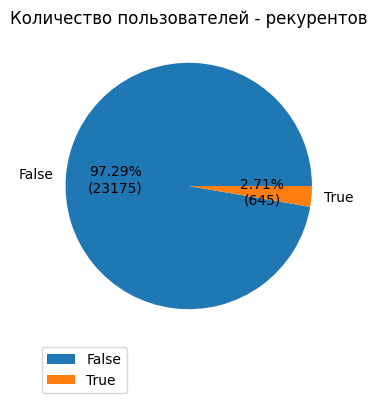

In [103]:
draw_pie(
    donors['is_recurrent'].value_counts().reset_index(name='cnt').set_index('is_recurrent'), 
    'cnt',
    'Количество пользователей - рекурентов'
)

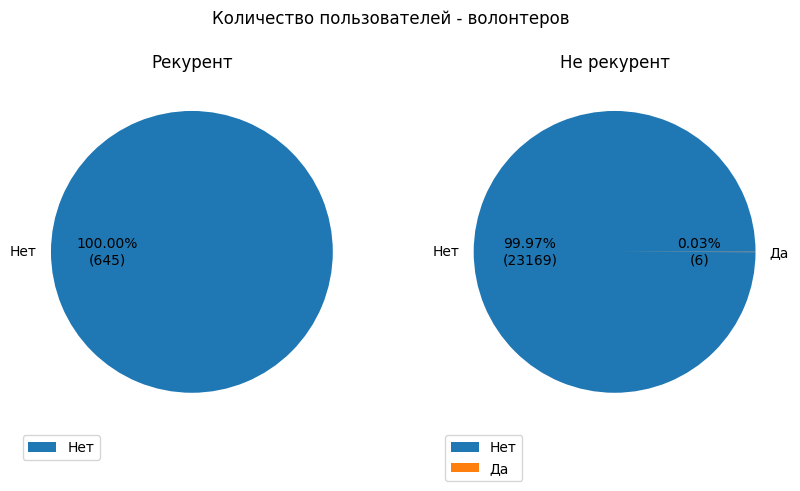

In [104]:
draw_pie_compare(
    donors, 
    'is_volunteer', 
    'is_recurrent', 
    True, 
    False, 
    'Количество пользователей - волонтеров',
    'Рекурент',
    'Не рекурент'
)

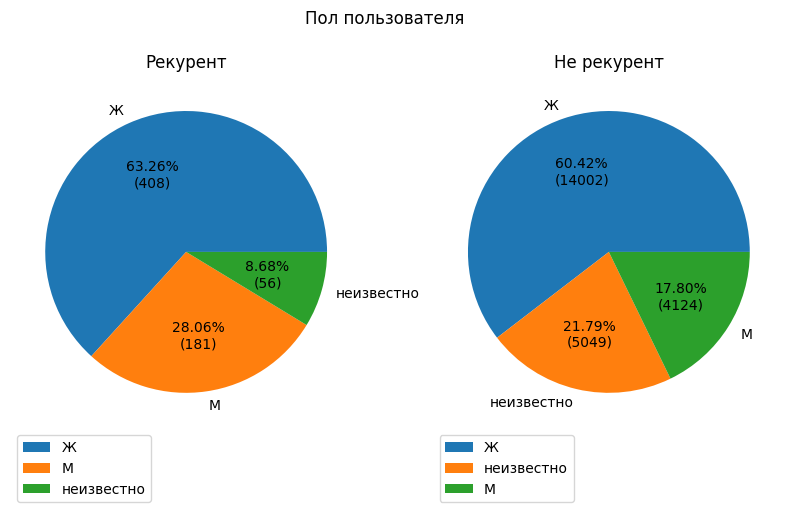

In [105]:
draw_pie_compare(
    donors, 
    'sex', 
    'is_recurrent', 
    True, 
    False, 
    'Пол пользователя',
    'Рекурент',
    'Не рекурент'
)

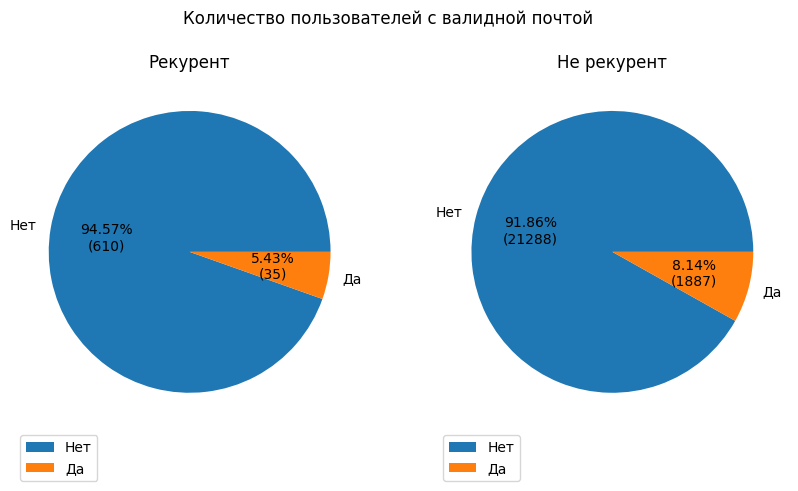

In [106]:
draw_pie_compare(
    donors, 
    'is_valid_email', 
    'is_recurrent', 
    True, 
    False, 
    'Количество пользователей с валидной почтой',
    'Рекурент',
    'Не рекурент'
)

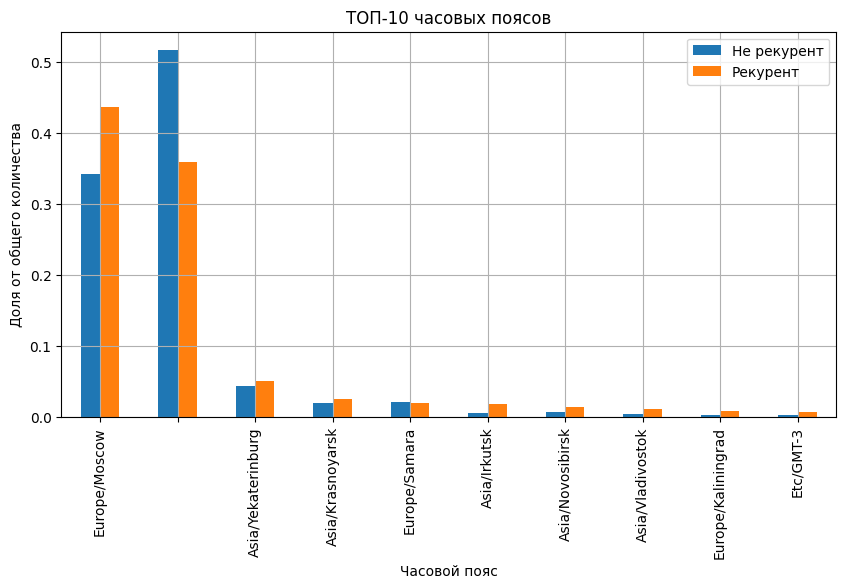

In [107]:
donors_timezone = (
    donors
    .pivot_table(index='timezone', columns='is_recurrent', values='user_id', aggfunc='count')
    .rename(columns={
        True: 'Рекурент',
        False: 'Не рекурент',
    })
)

draw_bar_сompare(
    donors_timezone.sort_values(by='Рекурент', ascending=False).head(10).div(donors_timezone.sum(axis=0), axis=1),
    'ТОП-10 часовых поясов',
    'Часовой пояс',
    'Доля от общего количества'
)

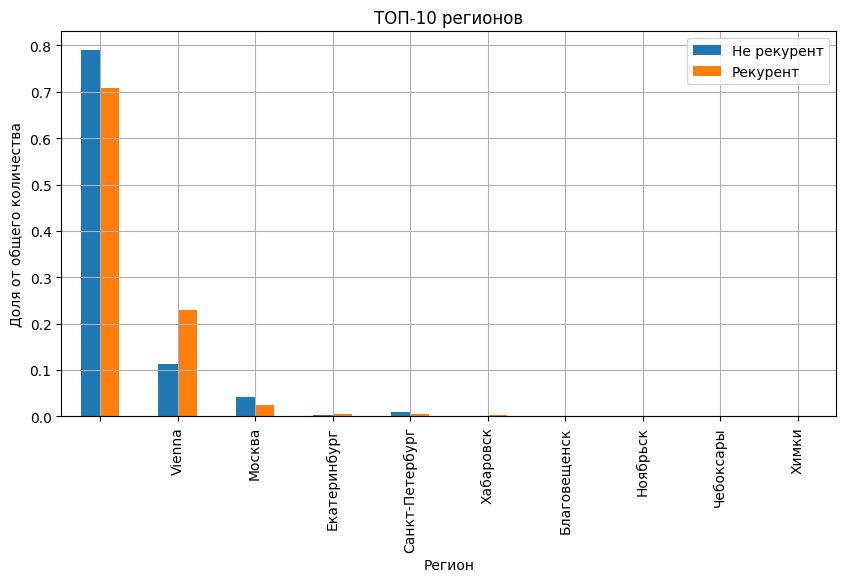

In [108]:
donors_region = (
    donors
    .pivot_table(index='region_name', columns='is_recurrent', values='user_id', aggfunc='count')
    .rename(columns={
        True: 'Рекурент',
        False: 'Не рекурент',
    })
)

draw_bar_сompare(
    donors_region.sort_values(by='Рекурент', ascending=False).head(10).div(donors_region.sum(axis=0), axis=1),
    'ТОП-10 регионов',
    'Регион',
    'Доля от общего количества'
)

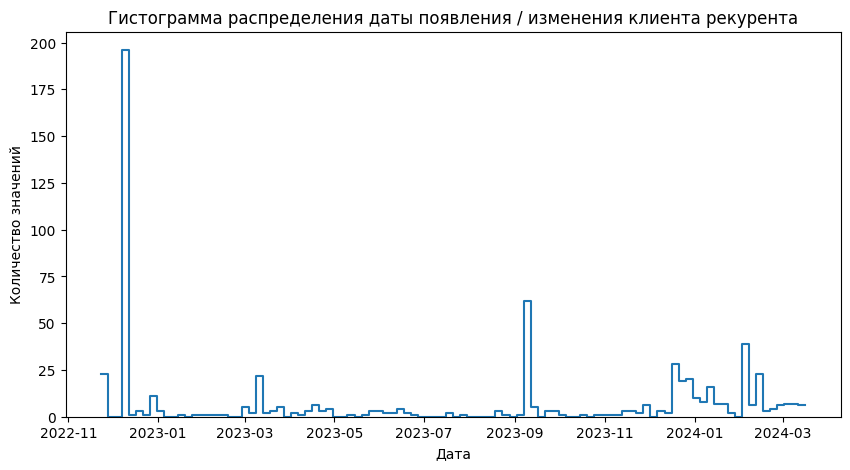

In [109]:
draw_hist_by_date(
    donors.query('is_recurrent == True'),
    ['update_date'],
    'Гистограмма распределения даты появления / изменения клиента рекурента'
)

In [110]:
donors.query('is_recurrent == True')['date'].value_counts().reset_index().head(3)

date  count
0 2022-12-09    196
1 2023-09-10     47
2 2024-02-02     37

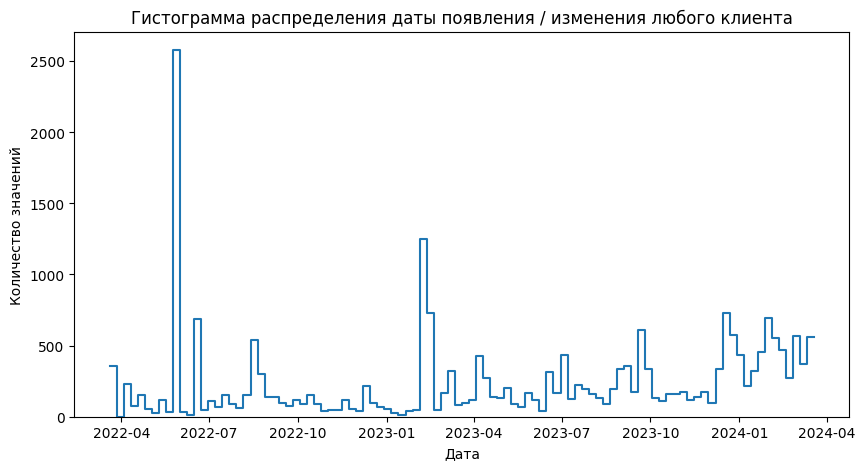

In [111]:
draw_hist_by_date(
    donors,
    ['update_date'],
    'Гистограмма распределения даты появления / изменения любого клиента'
)

In [112]:
donors['date'].value_counts().reset_index().head(3)

date  count
0 2022-05-26   2562
1 2023-02-08   1216
2 2023-02-17    667

status              Да  Нет  неизвестно
subscription_type                      
subscribed           1    1         643
subscribed_email   609   36           0
subscribed_mobile    1    1         643
subscribed_push     18    1         626
subscribed_sms       1    1         643
subscribed_viber     1    1         643

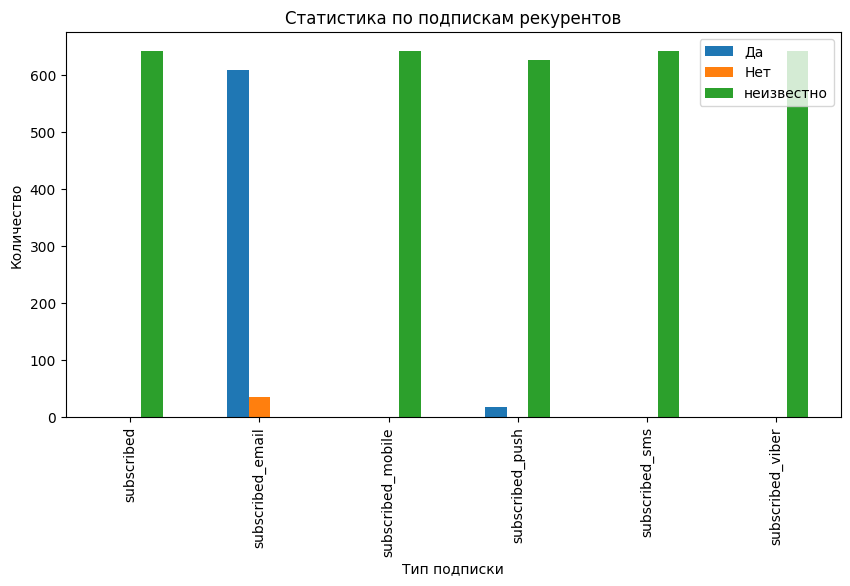

In [113]:
draw_bar_by_pivot(
    (donors.query('is_recurrent == True')[[
        'subscribed', 
        'subscribed_sms',
        'subscribed_email',
        'subscribed_viber',
        'subscribed_mobile',
        'subscribed_push',
    ]]), 'Статистика по подпискам рекурентов', 'Тип подписки', 'Количество')

status                Да   Нет  неизвестно
subscription_type                         
subscribed            11     9       23800
subscribed_email   20276  3202         342
subscribed_mobile     11     9       23800
subscribed_push      397     9       23414
subscribed_sms        35     9       23776
subscribed_viber      11     9       23800

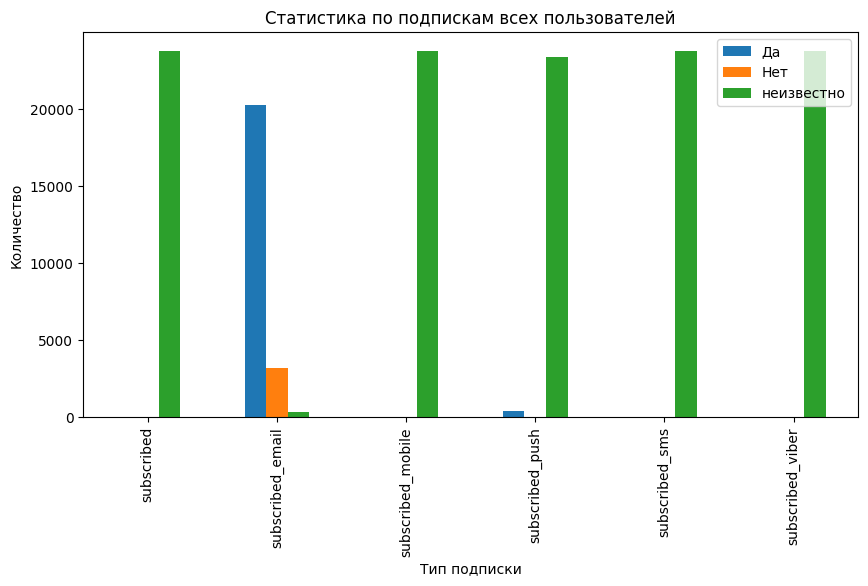

In [114]:
draw_bar_by_pivot(
    (donors[[
        'subscribed', 
        'subscribed_sms',
        'subscribed_email',
        'subscribed_viber',
        'subscribed_mobile',
        'subscribed_push',
    ]]), 'Статистика по подпискам всех пользователей', 'Тип подписки', 'Количество')

- Уникальных пользователей: 23820.
- Уникальных пользователей «исторического импорта»: 7343.
- Уникальных «новых» пользователей: 16477:
- Рекуренты: 2.7% от общего количества.
- Волонтеры: менее 1% от общего количества.
- Пол: около 60% женщины, около 20-30% мужчины (варьируется в зависимости от рекурентности пользователя), у остальных 10-20% не определено.
- Меньше чем у 10% пользователей подтверждена  электронная почта.
- Тайм зона у большего пользователей не определена, или Europe/Moscow.
- Регион так же не определён в большинстве случаев, но потом идет Vienna (возможно, это связано с использованием  VPN). На третьем месте – Москва.
- Почти 99% пользователей подписаны только через email.

### "Исторический импорт"

In [115]:
funnel_import = pd.DataFrame(
    {
        'type': [
            'Всего', 
            'Активные', 
            'Платящие',
            'Рекуренты'
        ], 
        'cnt': [
            donors.query('is_import == True')['user_id'].nunique(),
            channels.query('user_id in @history_import_ids and year == 2024')['user_id'].nunique(),
            orders.query('user_id in @history_import_ids and year == 2024')['user_id'].nunique(),
            orders.query('user_id in @history_import_ids and year == 2024 and is_recurrent == True')['user_id'].nunique()
        ]
    }
)
funnel_import['percentage'] = (funnel_import['cnt'] / funnel_import['cnt'].iloc[0]) * 100
funnel_import


type   cnt  percentage
0      Всего  7343  100.000000
1   Активные  5505   74.969359
2   Платящие   635    8.647692
3  Рекуренты   236    3.213945

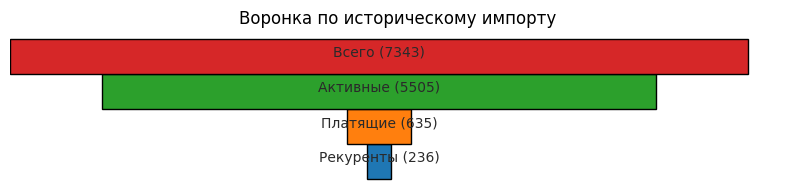

In [116]:
draw_funnel(
    funnel_import,
    'type',
    'cnt',
    'Воронка по историческому импорту'
)

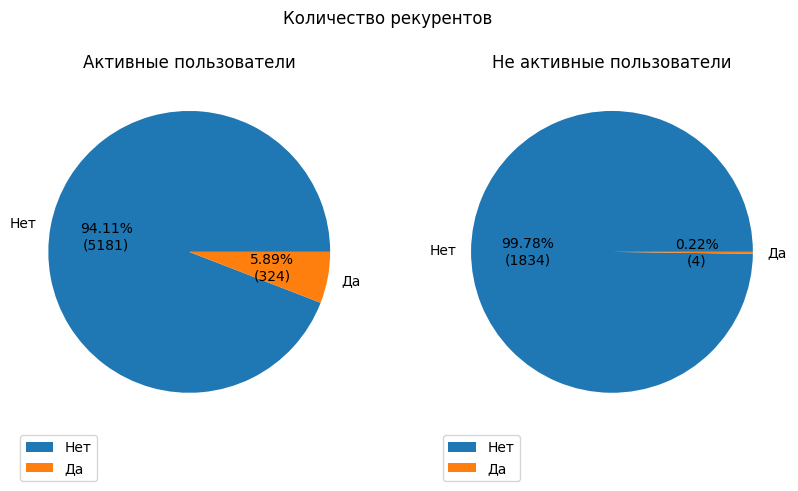

In [117]:
draw_pie_compare(
    donors.query('is_import == True'), 
    'is_recurrent', 
    'is_active', 
    True, 
    False, 
    'Количество рекурентов',
    'Активные пользователи',
    'Не активные пользователи'
)

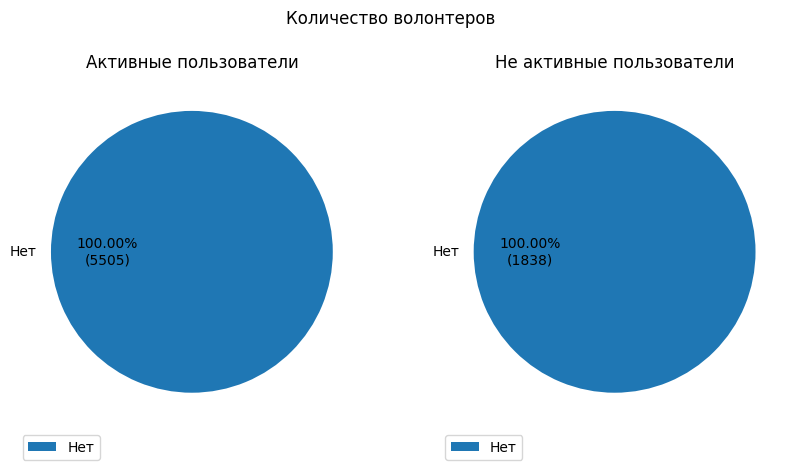

In [118]:
draw_pie_compare(
    donors.query('is_import == True'), 
    'is_volunteer', 
    'is_active', 
    True, 
    False, 
    'Количество волонтеров',
    'Активные пользователи',
    'Не активные пользователи'
)

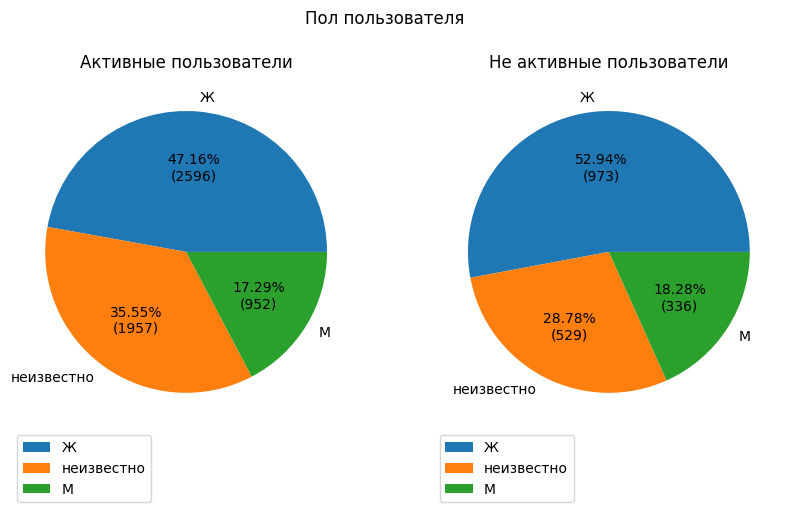

In [119]:
draw_pie_compare(
    donors.query('is_import == True'), 
    'sex', 
    'is_active', 
    True, 
    False, 
    'Пол пользователя',
    'Активные пользователи',
    'Не активные пользователи'
)

### "Новые" пользователи

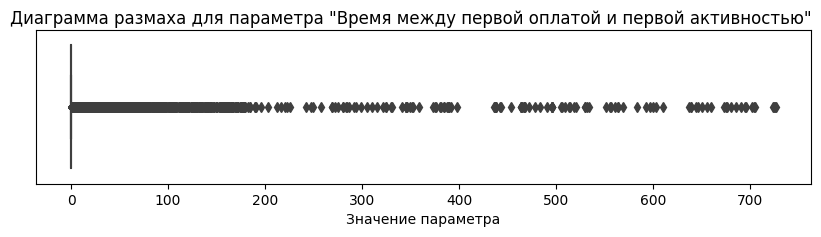

Всего значений: 21368

Среднее арифметическое значение: 5.18
Медианное значение: 0.0
В среднем значения варьируются от 0.0 до 0.0
Минимальное значение 0.0
Максимальное значение 726.0


In [120]:
first_stat = pd.merge(
    orders.query('is_first')[['user_id', 'create_date']], 
    channels.query('is_first')[['user_id', 'event_dt']], 
    on='user_id',
    how='outer'
)

first_stat['days'] = (first_stat['create_date'] - first_stat['event_dt']).dt.days

draw_box(
    first_stat, 
    'days', 
    'Диаграмма размаха для параметра "Время между первой оплатой и первой активностью"'
)


In [121]:
df_isna_info(first_stat)

Пропуски в датафрейме:


index   cnt percent
1  create_date  2452  10.29%
2     event_dt     2   0.01%
3         days  2454  10.30%

In [122]:
user_without_payed = first_stat[first_stat['create_date'].isna()]['user_id'].unique()

donors.query('user_id in @user_without_payed')['is_import'].value_counts()

is_import
True     1734
False     718
Name: count, dtype: int64

In [123]:
old_donor_idx = donors.query('is_import == True')['user_id'].unique()
new_donor_idx = donors.query('is_import == False')['user_id'].unique()


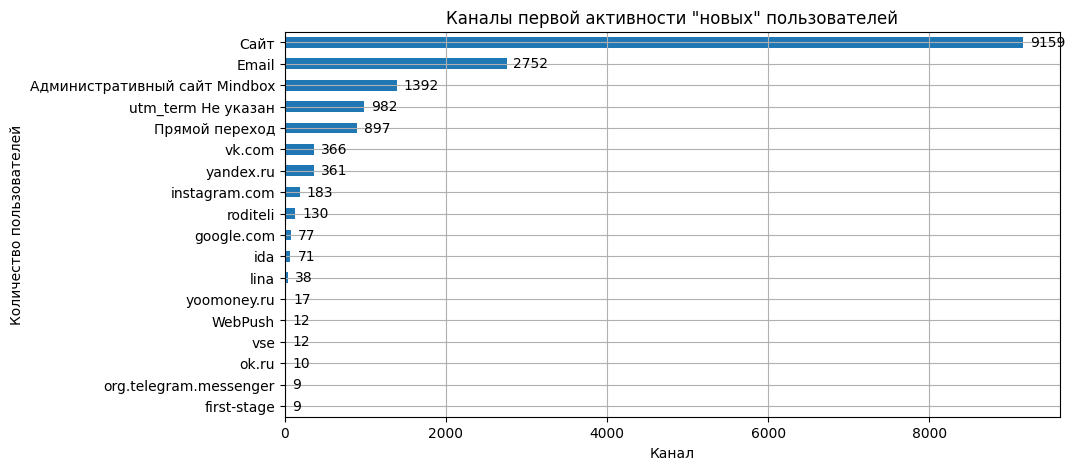

In [124]:
first_channel = channels.query('is_first and user_id in @new_donor_idx')['channel_id'].value_counts().reset_index(name='user_cnt')
first_channel['channel_name'] = first_channel['channel_id'].map(dic_channels)

draw_bar_horizontal(
    first_channel, 
    'channel_name',
    'user_cnt',
    'Каналы первой активности "новых" пользователей',
    'Канал',
    'Количество пользователей',
)

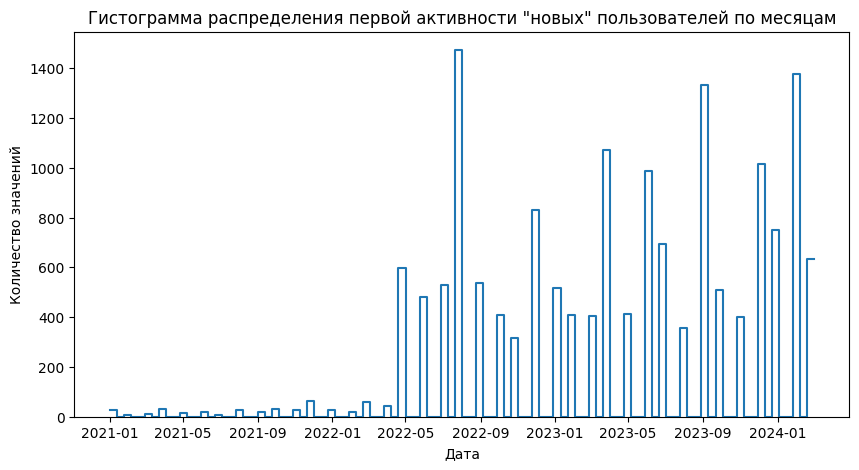

In [125]:

draw_hist_by_date(
    channels.query('is_first and user_id in @new_donor_idx'),
    ['month'],
    'Гистограмма распределения первой активности "новых" пользователей по месяцам'
)

In [126]:
channels.query('is_first and user_id in @new_donor_idx')['month'].value_counts().reset_index().head(5)

month  count
0 2022-08-01   1473
1 2024-02-01   1378
2 2023-09-01   1332
3 2023-04-01   1072
4 2023-12-01   1016

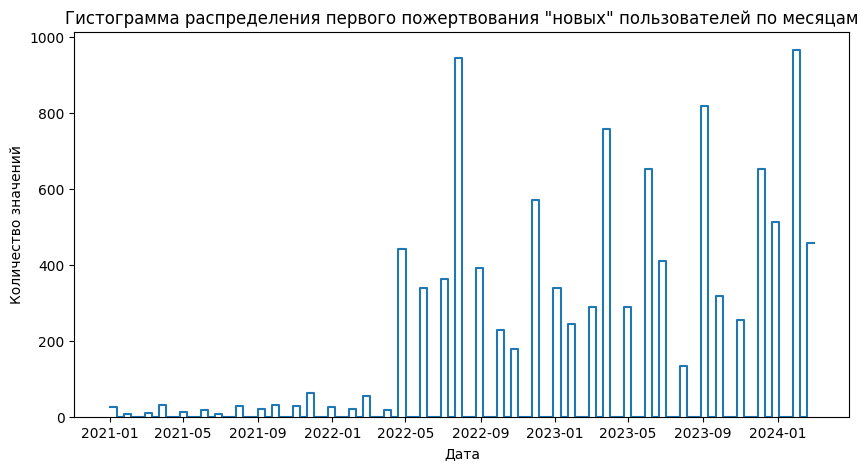

In [127]:
draw_hist_by_date(
    orders_payed.query('is_first and user_id in @new_donor_idx'),
    ['month'],
    'Гистограмма распределения первого пожертвования "новых" пользователей по месяцам'
)

In [128]:
orders_payed.query('is_first and user_id in @new_donor_idx')['month'].value_counts().reset_index().head(5)

month  count
0 2024-02-01    965
1 2022-08-01    943
2 2023-09-01    817
3 2023-04-01    758
4 2023-12-01    652

- 75% пользователей «исторического импорта» проявляют активность, при этом платящих клиентов только 8.6%, рекуренты из них – 3%.
- Волонтеров среди «исторического импорта» нет.
- Первым касанием с пользователем чаще всего является первая оплата (или ее попытка), во время которой фонд получает контактные данные пользователя, и может в дальнейшем информировать его с помощью рассылок. Но для 10% есть активности, хотя не было никаких оплат (треть из них это «исторический импорт»).
- Первая активность «новых пользователей» чаще всего была через Сайт, или Email.
- Всплеск первых активностей новых пользователей наблюдается августе 2022 года, феврале 2024 и сентябре 2023.
- Всплеск первых оплат новых пользователей наблюдался те же месяца.

### Оценка пользовательской активности

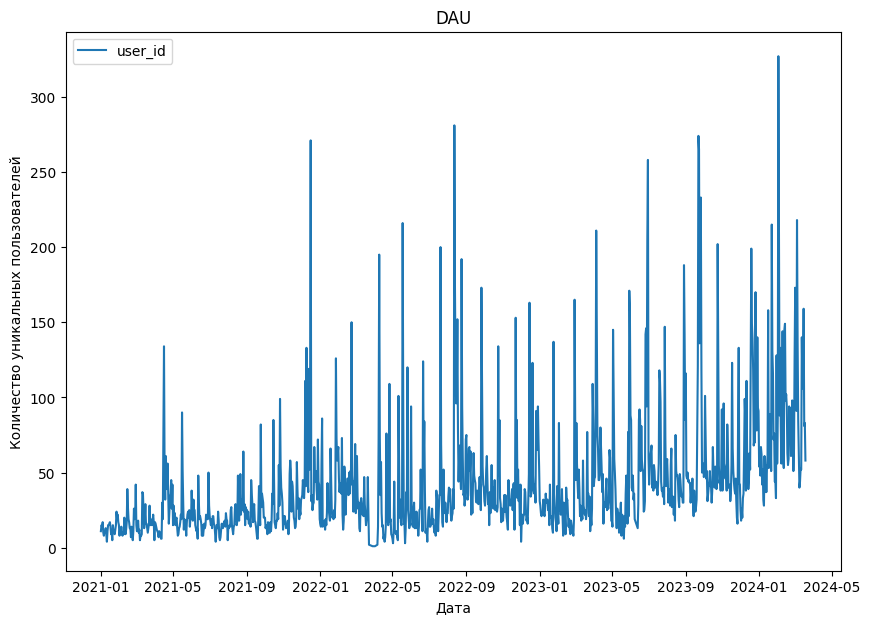

In [129]:
pivot_dau = (
    orders_payed
    .pivot_table(index='date', values='user_id', aggfunc='nunique')
    .fillna(0)
    .astype('int64')
    .reset_index()
    .set_index('date')
)
draw_plot_by_pivot(
    pivot_dau,
    'DAU',
    'Дата',
    'Количество уникальных пользователей'
)

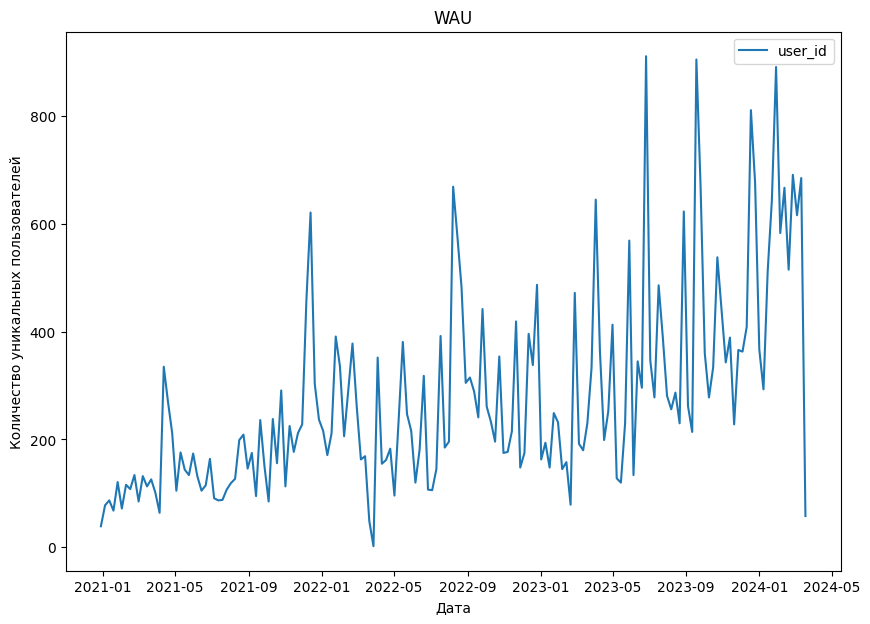

In [130]:
pivot_wau = (
    orders_payed
    .pivot_table(index='start_of_week', values='user_id', aggfunc='nunique')
    .fillna(0)
    .astype('int64')
    .reset_index()
    .set_index('start_of_week')
)
draw_plot_by_pivot(
    pivot_wau,
    'WAU',
    'Дата',
    'Количество уникальных пользователей'
)

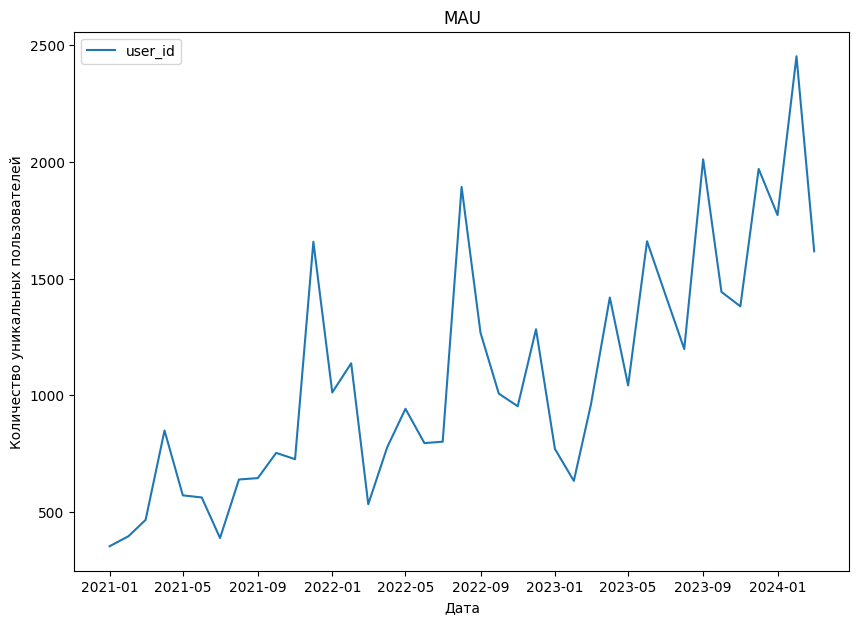

In [131]:
pivot_mau = (
    orders_payed
    .pivot_table(index='month', values='user_id', aggfunc='nunique')
    .fillna(0)
    .astype('int64')
    .reset_index()
    .set_index('month')
)
draw_plot_by_pivot(
    pivot_mau,
    'MAU',
    'Дата',
    'Количество уникальных пользователей'
)

На основе анализа графиков DAU (Daily Active Users) и MAU (Monthly Active Users) можно сделать следующие выводы:
- Оба показателя демонстрируют общую тенденцию к росту, что указывает на стабильное увеличение пользовательской базы и вовлеченности.
- Наблюдаются локальные падения активности в феврале 2022 и 2023 годов, что может быть связано с сезонными факторами или внешними событиями.
- В конце 2021 и середине 2022 года отмечен значительный рост, вероятно, вызванный успешными маркетинговыми кампаниями или улучшениями в сервисе.
- Максимальный пик активности наблюдается в начале 2024 года, что может свидетельствовать о крупных обновлениях или эффективных стратегиях привлечения пользователей.

## RFM анализ - сегментация клиентской базы

RFM — это метод, используемый для анализа потребительской ценности.

Он группирует клиентов на основе истории их транзакций:

- `Recency/Давность` — как давно клиент совершил покупку;
- `Frequency/Частота` — как часто он совершал покупки;
- `Monetary Value/Денежная ценность` — сколько он тратил.
  
В нашем случае выберем в качестве:

- `Recency` — время отсутствия пользователя (количество дней с момента последнего пожертвования);
- `Frequency` — количество пожертвований в день;
- `Monetary Value` — суммарный доход от пожертвований пользователя.


In [132]:
orders['order_id'].nunique()

73763

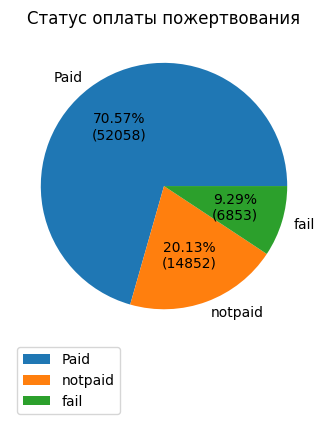

In [133]:
draw_pie(
    orders['status'].value_counts().reset_index().set_index('status'), 
    'count', 
    'Статус оплаты пожертвования'
)

Для RFM анализа будем использовать только такие платежи, которые имеют статус `Paid`.

In [134]:
info_from_orders = (
    orders_payed
    .groupby('user_id')
    .agg(
        {
            'create_date': lambda x: (start_date - x.max()).days, 
            'order_id': 'count',
            'total_price' : 'sum',
        }
    )
    .rename(
        columns={
            'create_date': 'r', 
            'order_id': 'order_cnt',
            'total_price' : 'm'
        }
    )
    .reset_index()
)


Для `Recency` необходимо посчитать количество пожертвований в день, для каждого пользователя, поэтому необходимо найти суммарное время активности пользователя в фонде.

In [135]:
info_from_active = (
    channels
    .groupby('user_id')
    .agg(
        {
            'action_date': lambda x: (x.max() - x.min()).days, 
        }
    )
    .rename(
        columns={
            'action_date' : 'active_day_cnt'
        }
    )
    .reset_index()
)


In [136]:
rfm = info_from_orders.merge(info_from_active, how = 'left', on='user_id').fillna(0)
rfm['f'] = (rfm['order_cnt'] / (rfm['active_day_cnt'] + 1)).round(4) 
rfm = rfm[['user_id', 'r', 'f', 'm']]
rfm

user_id    r       f       m
0         2734  886  0.0019    51.0
1         2847   94  0.0030  1000.0
2         2861  467  0.0064   120.0
3         3361  454  0.0029  3000.0
4         4982   34  0.0094   840.0
...        ...  ...     ...     ...
18716    46782    0  1.0000   500.0
18717    46783    0  1.0000   120.0
18718    46784    0  1.0000   300.0
18719    46787    0  1.0000   300.0
18720    46789    0  1.0000   150.0

[18721 rows x 4 columns]

Теперь необходимо просмегментировать каждого пользователя по каждому параметру рангом от 1 до 3. Для подсчета ранга будем использовать 33 и 66 перцентиль, при подсчете перцентилей выбросы учитывать не будем.

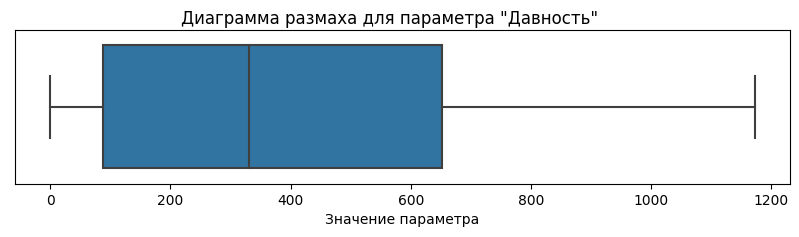

Всего значений: 18721

Среднее арифметическое значение: 392.93
Медианное значение: 331.0
В среднем значения варьируются от 88.0 до 652.0
Минимальное значение 0.0
Максимальное значение 1172.0
Разбиение клиентов на 3 сегмента по значению "r": [0, 165.0, 563.0, 1172]


In [137]:
draw_box(rfm, 'r', 'Диаграмма размаха для параметра "Давность"')

rfm['r_seg'] = pd.cut(rfm['r'], labels=[1,2,3], bins=rank_value(rfm, 'r'), include_lowest=True)


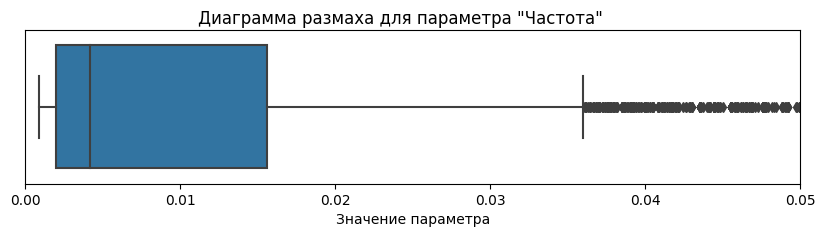

Всего значений: 18721

Среднее арифметическое значение: 0.02
Медианное значение: 0.0
В среднем значения варьируются от 0.0 до 0.02
Минимальное значение 0.0
Максимальное значение 2.0
Разбиение клиентов на 3 сегмента по значению "f": [0, 0.0023, 0.0069, 2.0]


In [138]:
draw_box(rfm, 'f', 'Диаграмма размаха для параметра "Частота"', 0, 0.05)

rfm['f_seg'] = pd.cut(rfm['f'], labels=[3,2,1], bins=rank_value(rfm, 'f'), include_lowest=True)


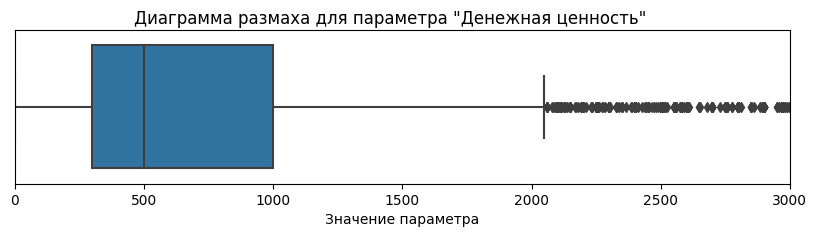

Всего значений: 18721

Среднее арифметическое значение: 2067.55
Медианное значение: 500.0
В среднем значения варьируются от 300.0 до 1000.0
Минимальное значение 0.0
Максимальное значение 1072500.0
Разбиение клиентов на 3 сегмента по значению "m": [0, 300.0, 500.0, 1072500.0]


In [139]:
draw_box(rfm, 'm', 'Диаграмма размаха для параметра "Денежная ценность"', 0, 3000)

rfm['m_seg'] = pd.cut(rfm['m'], labels=[3,2,1], bins=rank_value(rfm, 'm'), include_lowest=True)


In [140]:
rfm['RFM'] = rfm['r_seg'].astype('str') + rfm['f_seg'].astype('str') + rfm['m_seg'].astype('str')
rfm

user_id    r       f       m r_seg f_seg m_seg  RFM
0         2734  886  0.0019    51.0     3     3     3  333
1         2847   94  0.0030  1000.0     1     2     1  121
2         2861  467  0.0064   120.0     2     2     3  223
3         3361  454  0.0029  3000.0     2     2     1  221
4         4982   34  0.0094   840.0     1     1     1  111
...        ...  ...     ...     ...   ...   ...   ...  ...
18716    46782    0  1.0000   500.0     1     1     2  112
18717    46783    0  1.0000   120.0     1     1     3  113
18718    46784    0  1.0000   300.0     1     1     3  113
18719    46787    0  1.0000   300.0     1     1     3  113
18720    46789    0  1.0000   150.0     1     1     3  113

[18721 rows x 8 columns]

В итоге получилось 27 сегментов с числовыми значениями распределёнными определённым образом в интервале от 111 до 333 включительно, где: 
- первая цифра - показатель “Давность” пожертвования:
    - 1 - пожертвование не позднее 165 дней назад.
    - 2 - пожертвование от 165 до 563 дней назад.
    - 3 - пожертвование раньше 563 дней назад.
- вторая - показатель “Частота” (отношение количества пожертвований на количество дней жизни донора):
    - 1 - пожертвование не реже 0.0069 раза в сутки.
    - 2 - пожертвование от 0.0023 до 0.0069 раза в сутки.
    - 3 - пожертвование реже 0.0023 раза в сутки.
- третья - показатель “Денежная ценность”:
    - 1 - суммарно более 500 рублей.
    - 2 - суммарно от 300 до 500 рублей.
    - 3 - менее 300 рублей.

Для удобства и упрощения восприятия некоторые сегменты можно объединять в группы.


In [141]:
rfm_data

RFM                         Определение сегмента     Определение группы
0   111    Недавно покупавшие частые с высоким чеком                    VIP
1   112   Недавно покупавшие частые со средним чеком               Выгодные
2   113     Недавно покупавшие частые с низким чеком               Выгодные
3   121    Недавно покупавшие редкие с высоким чеком  Потенциально выгодные
4   122   Недавно покупавшие редкие со средним чеком  Потенциально выгодные
5   123     Недавно покупавшие редкие с низким чеком              Новенькие
6   131   Недавно покупавшие разовые с высоким чеком              Новенькие
7   132  Недавно покупавшие разовые со средним чеком              Новенькие
8   133    Недавно покупавшие разовые с низким чеком              Новенькие
9   211                Спящие частые с высоким чеком        Спящие выгодные
10  212               Спящие частые со средним чеком        Спящие выгодные
11  213                 Спящие частые с низким чеком        Спящие выгодные
12  221                Спящие редкие с высоким чеком        Спящие выгодные
13  222               Спящие редкие со средним чеком        Спящие выгодные
14  223                 Спящие редкие с низким чеком                 Спящие
15  231               Спящие разовые с высоким чеком                 Спящие
16  232              Спящие разовые со средним чеком                 Спящие
17  233                Спящие разовые с низким чеком                 Спящие
18  311                Давние частые с высоким чеком      Уходящие выгодные
19  312               Давние частые со средним чеком      Уходящие выгодные
20  313                 Давние частые с низким чеком               Уходящие
21  321                Давние редкие с высоким чеком               Уходящие
22  322               Давние редкие со средним чеком               Уходящие
23  323                 Давние редкие с низким чеком             Потерянные
24  331               Давние разовые с высоким чеком             Потерянные
25  332              Давние разовые со средним чеком             Потерянные
26  333                Давние разовые с низким чеком             Потерянные

In [142]:
rfm_stat = (
    rfm['RFM']
    .value_counts(normalize=True) * 100
)


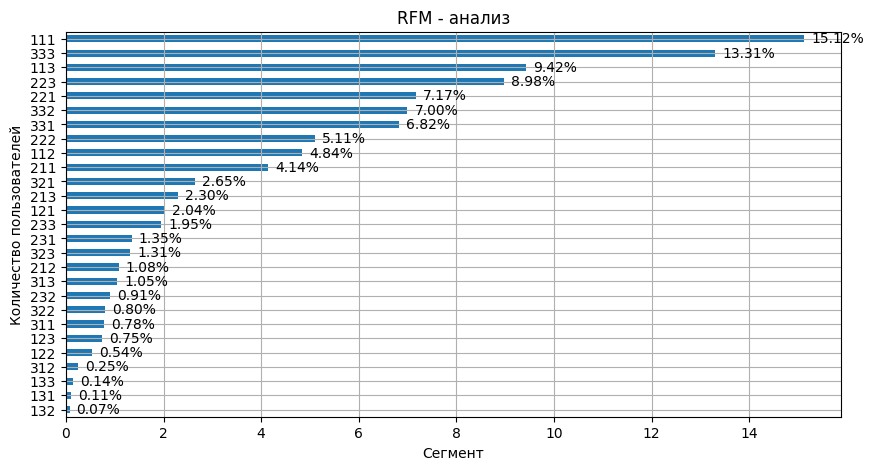

In [143]:
draw_bar_normalize(
    rfm_stat.reset_index(name='cnt').sort_values(by='cnt'), 
    'RFM',
    'cnt',
    'RFM - анализ',
    'Сегмент',
    'Количество пользователей',
    horizontal=True
)

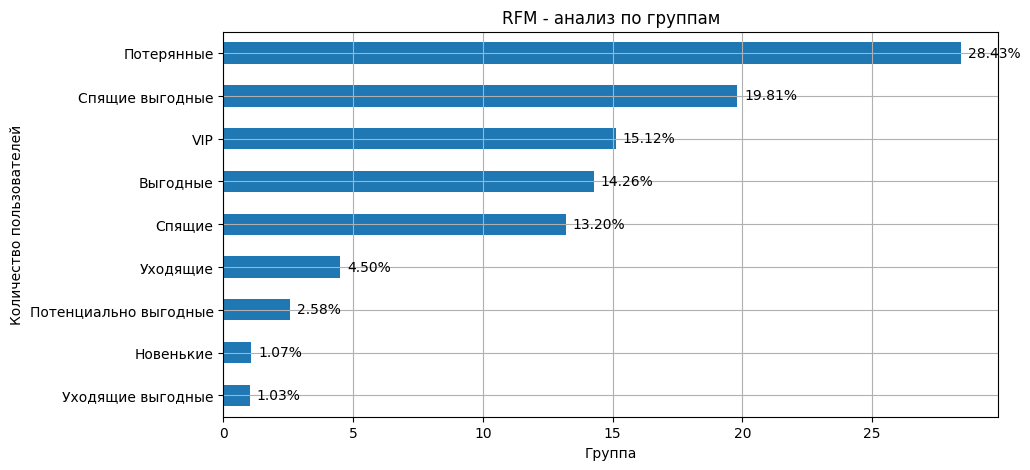

In [144]:
draw_bar_normalize(
    (
        pd
        .merge(rfm_data, rfm_stat.reset_index(name='cnt'), on='RFM')
        .groupby('Определение группы')['cnt']
        .sum()
        .reset_index()
        .sort_values(by='cnt')
    ),
    'Определение группы',
    'cnt',
    'RFM - анализ по группам',
    'Группа',
    'Количество пользователей',
    horizontal=True
)

In [145]:
rfm_lost = rfm.query('RFM in ("333", "331", "332", "333")')['user_id'].unique()
donors_lost = donors.query('user_id in @rfm_lost')


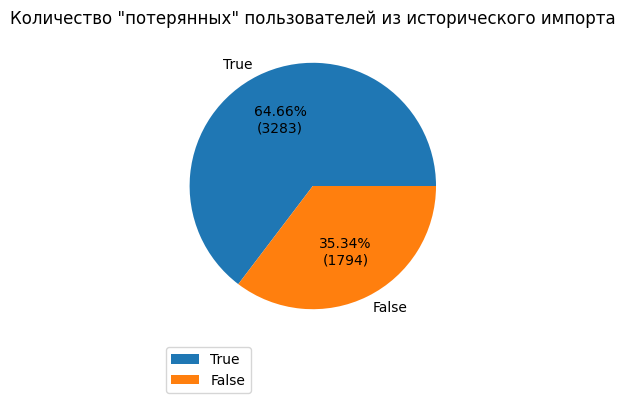

In [146]:
draw_pie(
    donors_lost['is_import'].value_counts().reset_index(name='cnt').set_index('is_import'), 
    'cnt',
    'Количество "потерянных" пользователей из исторического импорта'
)

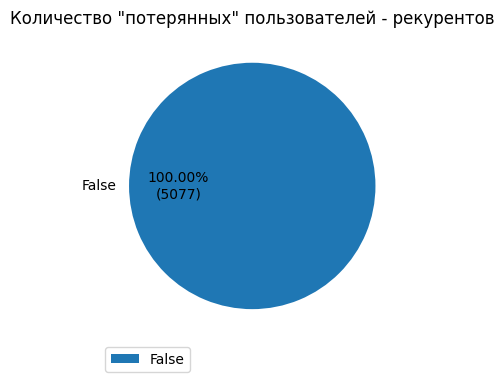

In [147]:
draw_pie(
    donors_lost['is_recurrent'].value_counts().reset_index(name='cnt').set_index('is_recurrent'), 
    'cnt',
    'Количество "потерянных" пользователей - рекурентов'
)

Анализ сегментов выявил наиболее популярные категории клиентов благотворительного фонда. Сегмент 111 (15.12%) приносит наибольшую ценность компании. Сегмент 333 (13.32%) - менее ценный для компании. Сегмент 113 (9.42%) - клиенты готовы жертвовать крупные суммы, но их необходимо мотивировать к более частым пожертвованиям. Сегмент 223 (8.99%) клиенты нейтральны и требуют более глубокого анализа.


Выводы:
- Удержание доноров из сегмента 111 (недавние, частые и крупные пожертвования) - наибольшая ценность для фонда:
    - Отправление индивидуальных писем с благодарностями и отчетами о результатах пожертвований.
    - Создание программ, которые поощряют постоянные пожертвования, например, предоставление донорских привилегий.
- Стимулирование доноров из сегмента 113 (недавние и частые, но малые пожертвования) - готовы жертвовать суммы, но нужно мотивировать на увеличение пожертвований:
    - Регулярное информирование таких доноров о текущих проектах и результатах их пожертвований.
    - Предложение поучаствовать в различных проектах фонда, которые могут их заинтересовать.
- Активизация доноров из сегмента 223 (средние значения по всем параметрам) - нейтральный сегмент, требует внимания и анализа:
    - Анализ обратной связи, чтобы понять их потребности и желания.
- Реактивация доноров из сегмента 333 (редкие, давние и небольшие пожертвования) - менее ценный сегмент, но потенциально можно реактивировать:
    - Предоставление уникальных предложений для возвращения доноров, такие как матчи пожертвований (удваивание пожертвований за счет крупного донора).
    - Использование автоматических напоминаний и уведомлений о возможности пожертвовать.
- Работа с другими сегментами:
    - Для сегментов с высокими показателями F и M, но низкими R (например, 211, 213): необходимо сосредоточиться на возвращении доноров, стимулируя частоту пожертвований.
    - Для сегментов с высокими показателями R и F, но низкими M (например, 321, 121): необходимо сосредоточиться на увеличении среднего размера пожертвования.


Общие рекомендации:

- Использование данных для создания персонализированных предложений и благодарностей.
- Постоянный анализ поведения доноров и обновление RFM-анализа.
- Прозрачная отчетность о том, как используются пожертвования.
- Вовлечение доноров в деятельность фонда.
  
Расширение базы точек контактов доноров может помочь вернуть "Спящих клиентов":
- Сбор номеров мобильных телефонов при регистрации или активном действии, объясняя это необходимостью более оперативного и удобного информирования. Электронные письма не самый удачный канал для оповещения доноров, но именно он чаще всего встречается у пользователей.
- Использование SMS-уведомлений с напоминаниями о пожертвованиях, ссылками на отчеты и новостями фонда.
- Оптимизация частоты и контента сообщений, сообщения должны быть краткими и информативными, необходимо изюегать чрезмерного количества отправок.
- Использование мессенджеров.
  
Стимулирование рекуррентных пожертвований:
- Объяснение значимости регулярных пожертвований.
- Простая настройка и отмена регулярных платежей.
- Идеи для стимулирования, такие как округление счетов (работа совместно с банками).
- Программы лояльности и поощрения.
- Прозрачность и отчетность.
- Мобильные приложения и автоматизация.
  
Эти шаги помогут эффективно предложить рекуррентные платежи донорам, которые готовы к этому, и обеспечат стабильное финансирование для реализации благотворительных проектов.

## Коммерческие метрики

### Средний чек

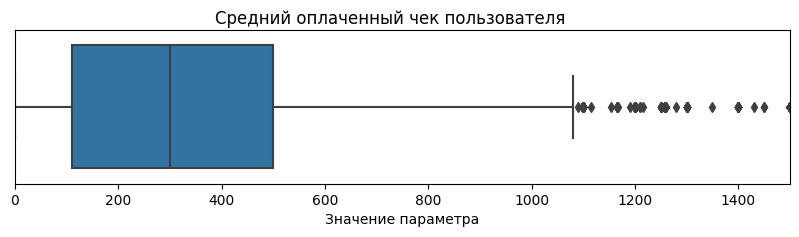

Всего значений: 52058

Среднее арифметическое значение: 743.53
Медианное значение: 300.0
В среднем значения варьируются от 110.0 до 500.0
Минимальное значение 0.0
Максимальное значение 200000.0


In [148]:
draw_box(
    orders_payed,
    'total_price',
    'Средний оплаченный чек пользователя',
    0,
    1500
)

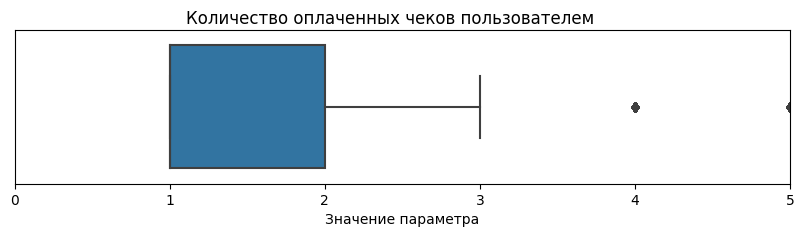

Всего значений: 18721

Среднее арифметическое значение: 2.78
Медианное значение: 1.0
В среднем значения варьируются от 1.0 до 2.0
Минимальное значение 1.0
Максимальное значение 157.0


In [149]:
draw_box(
    orders_payed.groupby('user_id')['order_id'].count().reset_index(name='cnt'),
    'cnt',
    'Количество оплаченных чеков пользователем',
    0,
    5
)

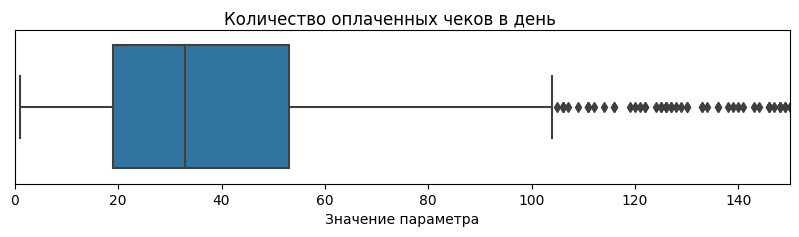

Всего значений: 1157

Среднее арифметическое значение: 44.99
Медианное значение: 33.0
В среднем значения варьируются от 19.0 до 53.0
Минимальное значение 1.0
Максимальное значение 336.0


In [150]:
draw_box(
    orders_payed.groupby('date')['order_id'].count().reset_index(name='cnt'),
    'cnt',
    'Количество оплаченных чеков в день',
    0,
    150
)

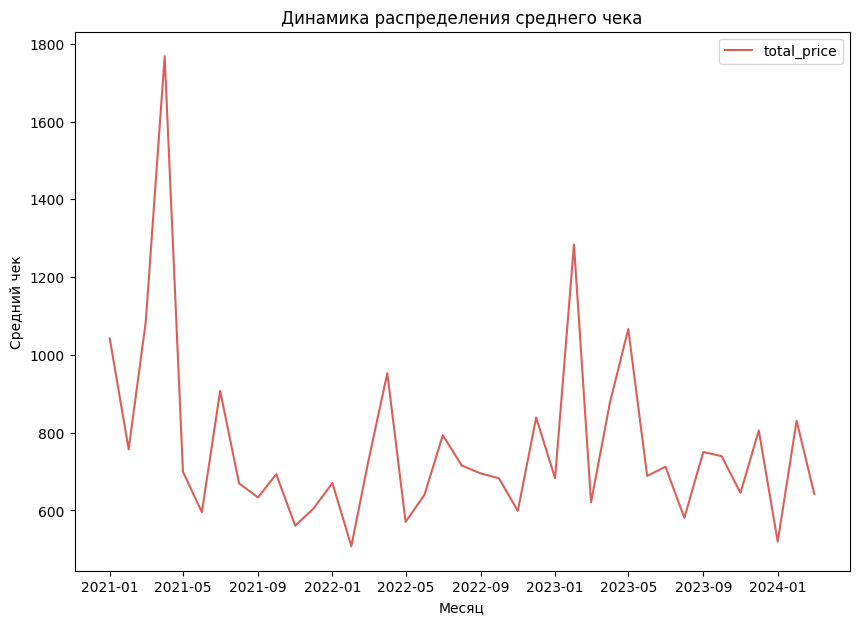

In [151]:
draw_plot(
    orders_payed.pivot_table(index='month', values='total_price', aggfunc='mean'), 
    'total_price',
    'Динамика распределения среднего чека', 
    'Месяц', 
    'Средний чек'
)

In [152]:
orders_payed.groupby('month')['total_price'].mean().reset_index(name='mean_price').sort_values(by='mean_price', ascending=False).head(5)

month   mean_price
3  2021-04-01  1767.949840
25 2023-02-01  1283.864644
2  2021-03-01  1084.623077
28 2023-05-01  1066.572650
0  2021-01-01  1042.240566

In [153]:
orders_payed.groupby('month')['total_price'].mean().reset_index(name='mean_price').sort_values(by='mean_price', ascending=False).tail(5)

month  mean_price
31 2023-08-01  581.264093
16 2022-05-01  570.790807
10 2021-11-01  560.898345
36 2024-01-01  520.062776
13 2022-02-01  508.150388

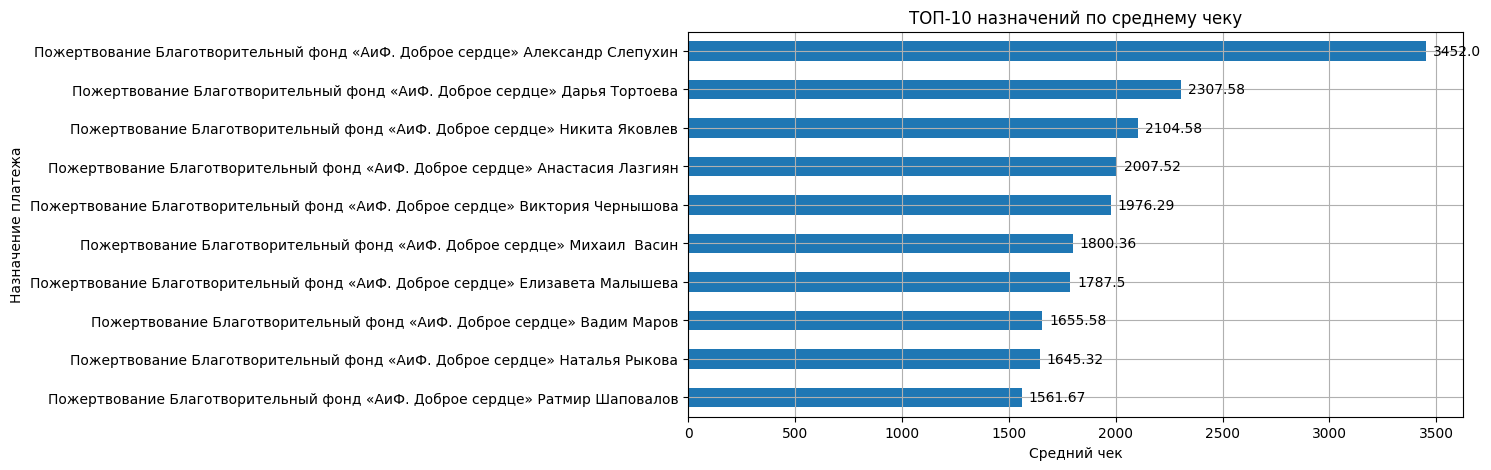

In [154]:
draw_bar_horizontal(
    orders_payed.groupby('product_name')['total_price'].mean().round(2).reset_index(name='mean_price').sort_values(by='mean_price', ascending=False).head(10), 
    'product_name', 
    'mean_price',
    'ТОП-10 назначений по среднему чеку',
    'Средний чек',
    'Назначение платежа'
)

Выводы:

- Среднее пожертвование пользователя варьируется от 110 до 500 рублей.
- Среднее количество оплат на одного пользователя от 1 до 3х.
- Среднее количество платежей в день колеблется от 19 до 53.
- Самый высокий средний чек наблюдался в апреле 2024 года, в феврале 2023 и марте 2023 года.
- Самый низкий средний чек наблюдался в феврале 2022, январе 2024 и ноябре 2021 года.
- Самый высокий средний чек по назначению платежа был для Александра Слепухина, Дарьи Тортоевой и Никиты Яковлева.

### Главный источник входа для пользователей

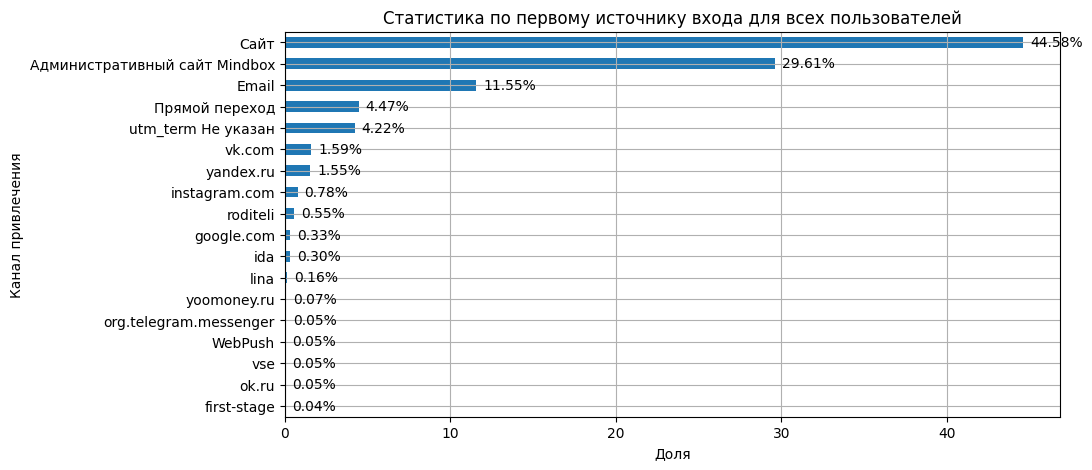

In [155]:
main_channel_stat = (
    (
        channels
        .query('is_first')['channel_id']
        .value_counts(normalize=True) * 100
    )
    .reset_index(name='percent')
    .sort_values(by='percent')
)
main_channel_stat['channel_name'] = main_channel_stat['channel_id'].map(dic_channels)

draw_bar_normalize(
    main_channel_stat, 
    'channel_name', 
    'percent',
    'Статистика по первому источнику входа для всех пользователей',
    'Доля',
    'Канал привлечения',
    horizontal=True
)


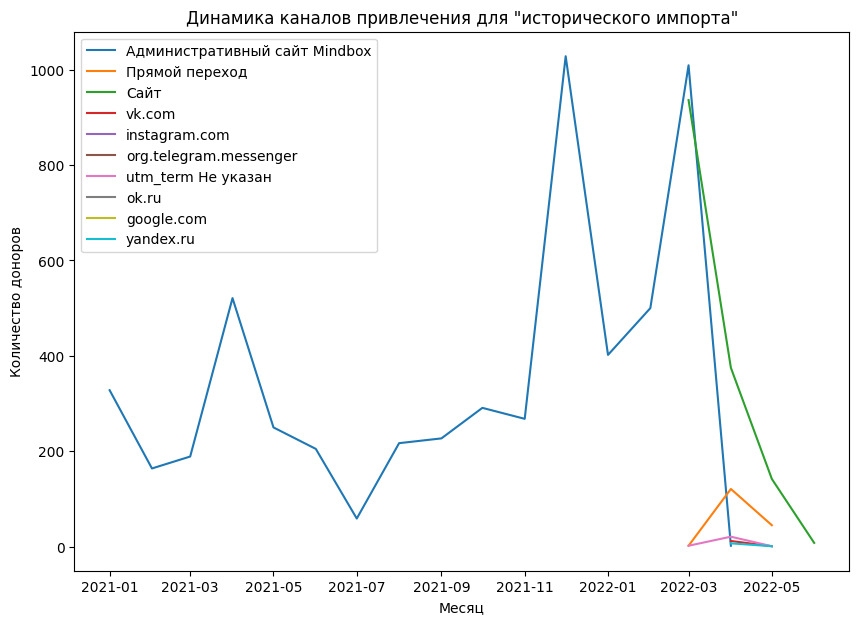

In [156]:
main_channel_stat_import =(
    channels
    .query('is_first and user_id in @history_import_ids')
    .pivot_table(index='month', columns='channel_id', values='user_id', aggfunc= 'count')
)

main_channel_stat_import.rename(columns=dic_channels, inplace=True)

draw_plot_by_pivot(
    main_channel_stat_import,
    'Динамика каналов привлечения для "исторического импорта"',
    'Месяц',
    'Количество доноров'
)


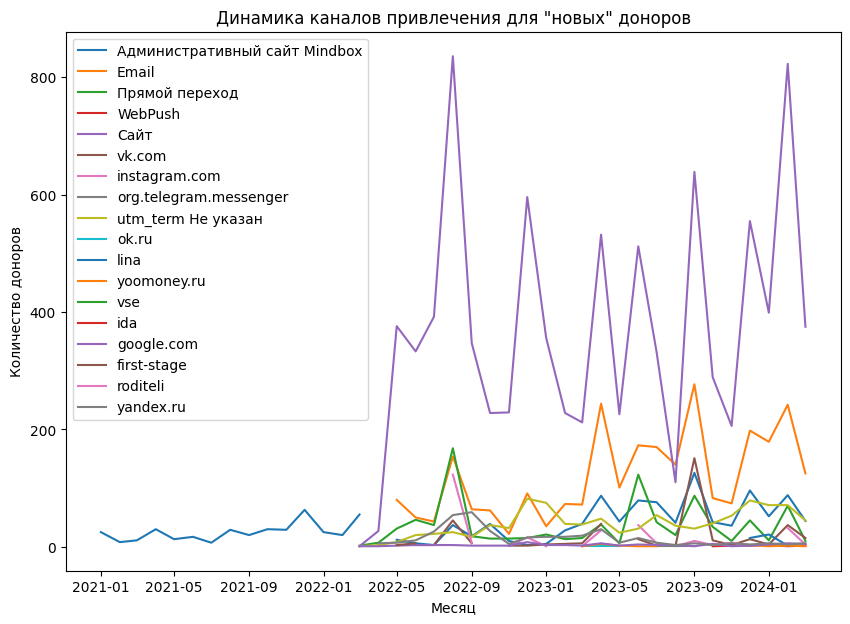

In [157]:
main_channel_stat_import =(
    channels
    .query('is_first and user_id not in @history_import_ids')
    .pivot_table(index='month', columns='channel_id', values='user_id', aggfunc= 'count')
)

main_channel_stat_import.rename(columns=dic_channels, inplace=True)

draw_plot_by_pivot(
    main_channel_stat_import,
    'Динамика каналов привлечения для "новых" доноров',
    'Месяц',
    'Количество доноров'
)


In [158]:
channels.query('is_first')['month'].value_counts().reset_index().head(5)

month  count
0 2022-03-01   2009
1 2022-08-01   1473
2 2024-02-01   1378
3 2023-09-01   1332
4 2021-12-01   1091

Главным источником входа пользователя чаще всего является Сайт. Клиент делает пожертвование, после кого оставляет свои контакты в системе, этот момент можно считать первым касанием с пользователем.

Пользователи из "исторического импорта" совершили свое касание после импорта данных до мая 2022, кто этого хотел, больше не было новых вхождений исторического импорта. 

Новые пользователи активно подключаются к фонду.

### Активность по дням недели

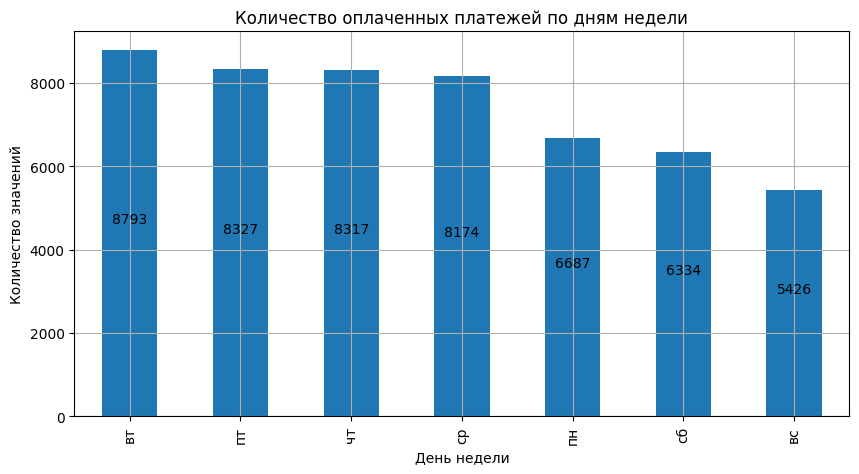

In [159]:
draw_bar(
    orders_payed['day_of_week'].map(dict_day_of_week).value_counts().reset_index(name='cnt'), 
    'day_of_week', 
    'cnt',
    'Количество оплаченных платежей по дням недели',
    'День недели',
)

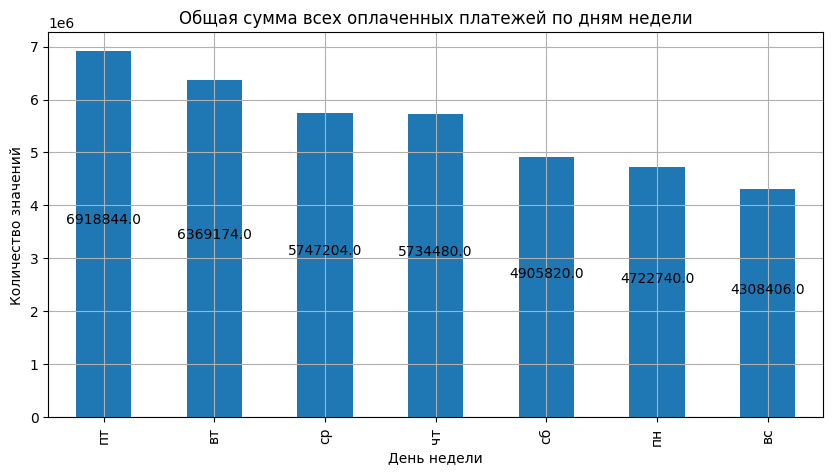

In [160]:
orders_by_dayweek = orders_payed.groupby('day_of_week')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
orders_by_dayweek['day_of_week'] = orders_by_dayweek['day_of_week'].map(dict_day_of_week)

draw_bar(
    orders_by_dayweek, 
    'day_of_week', 
    'total_price',
    'Общая сумма всех оплаченных платежей по дням недели',
    'День недели',
)

### Активность по времени суток

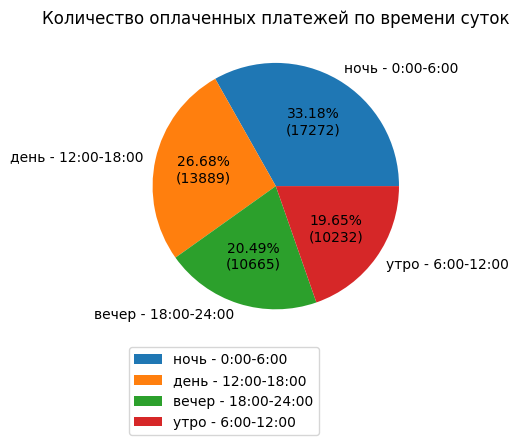

In [161]:
draw_pie(
    orders_payed['part_of_day'].map(dict_part_of_day).value_counts().reset_index(name='cnt').set_index('part_of_day'), 
    'cnt',
    'Количество оплаченных платежей по времени суток'
)

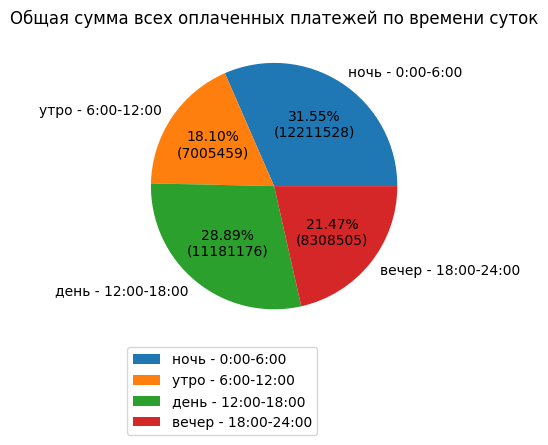

In [162]:
orders_by_partday = orders_payed.groupby('part_of_day')['total_price'].sum().reset_index().set_index('part_of_day')
orders_by_partday.index = orders_by_partday.index.map(dict_part_of_day)

draw_pie(
    orders_by_partday, 
    'total_price',
    'Общая сумма всех оплаченных платежей по времени суток'
)

### Активность по месяцам

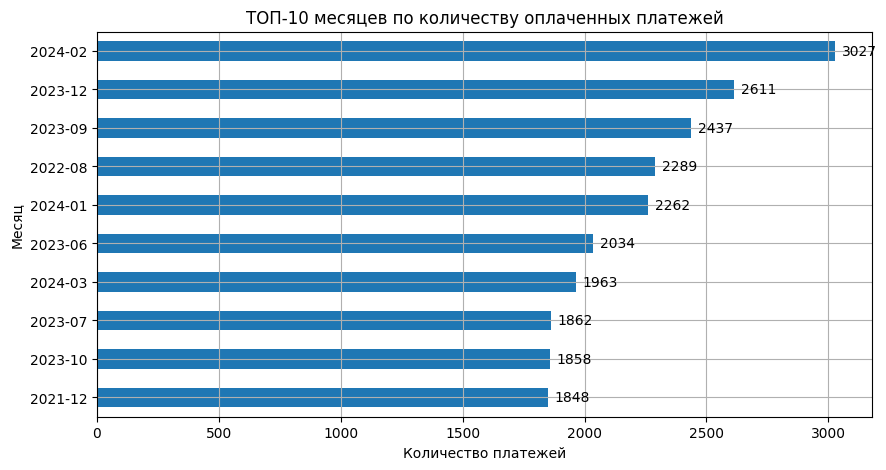

In [163]:
draw_bar_horizontal(
    orders_payed.groupby('order_month')['order_id'].count().reset_index(name='cnt').sort_values(by='cnt').tail(10), 
    'order_month', 
    'cnt',
    'ТОП-10 месяцев по количеству оплаченных платежей',
    'Количество платежей',
    'Месяц'
)

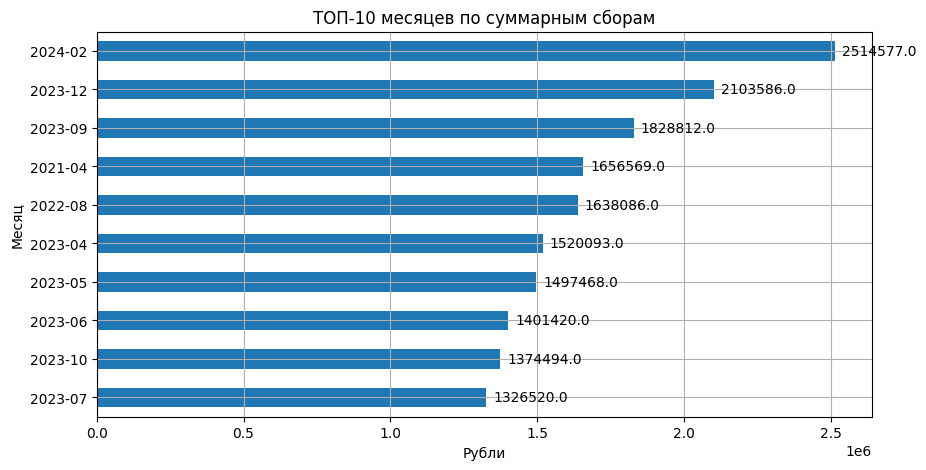

In [164]:
draw_bar_horizontal(
    orders_payed.groupby('order_month')['total_price'].sum().reset_index(name='cnt').sort_values(by='cnt').tail(10), 
    'order_month', 
    'cnt',
    'ТОП-10 месяцев по суммарным сборам',
    'Рубли',
    'Месяц'
)

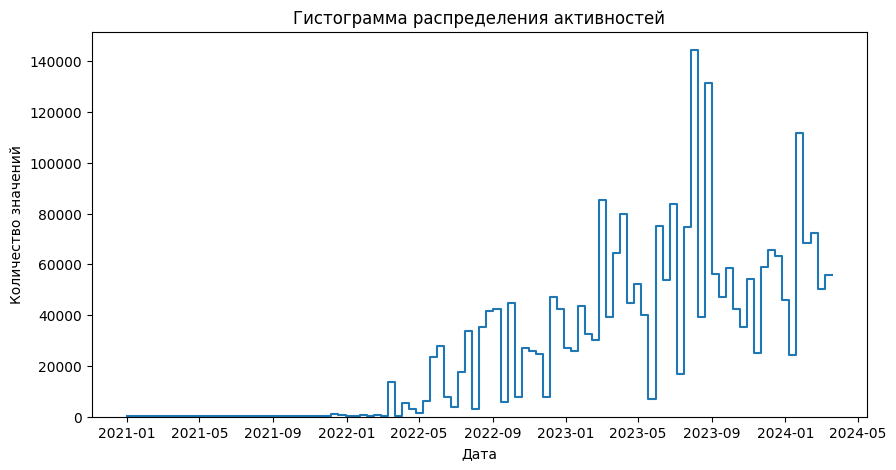

In [165]:
draw_hist_by_date(
    channels,
    ['action_date'],
    'Гистограмма распределения активностей'
)

In [166]:
channels['action_date'].value_counts().reset_index().head(3)

action_date  count
0  2023-08-29  34714
1  2023-07-28  33292
2  2023-11-28  33195

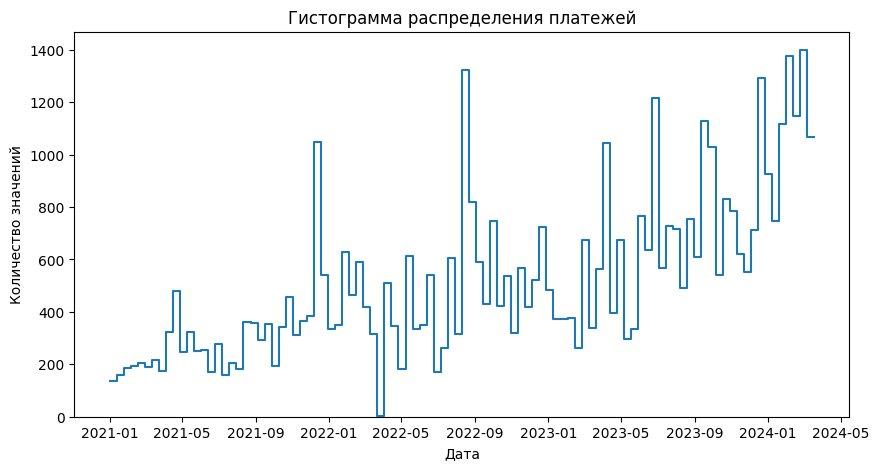

In [167]:
draw_hist_by_date(
    orders_payed,
    ['date'],
    'Гистограмма распределения платежей'
)

In [168]:
orders_payed['date'].value_counts().reset_index().head(5)

date  count
0 2024-02-02    336
1 2022-08-12    300
2 2023-09-22    285
3 2023-06-30    280
4 2021-12-16    273

Выводы:

- Самые активные дни недели по количеству пожертвований вторник, пятница. Менее активные суббота, воскресенье и понедельник.
- Чаще всего пожертвования происходят в ночное время суток, реже всего утром.
- Самые активные месяца за всю историю по количеству пожертвований – февраль 2024, декабрь 2023 и сентябрь 2023 года.

## Маркетинговые метрики

### Первое касание пользователя

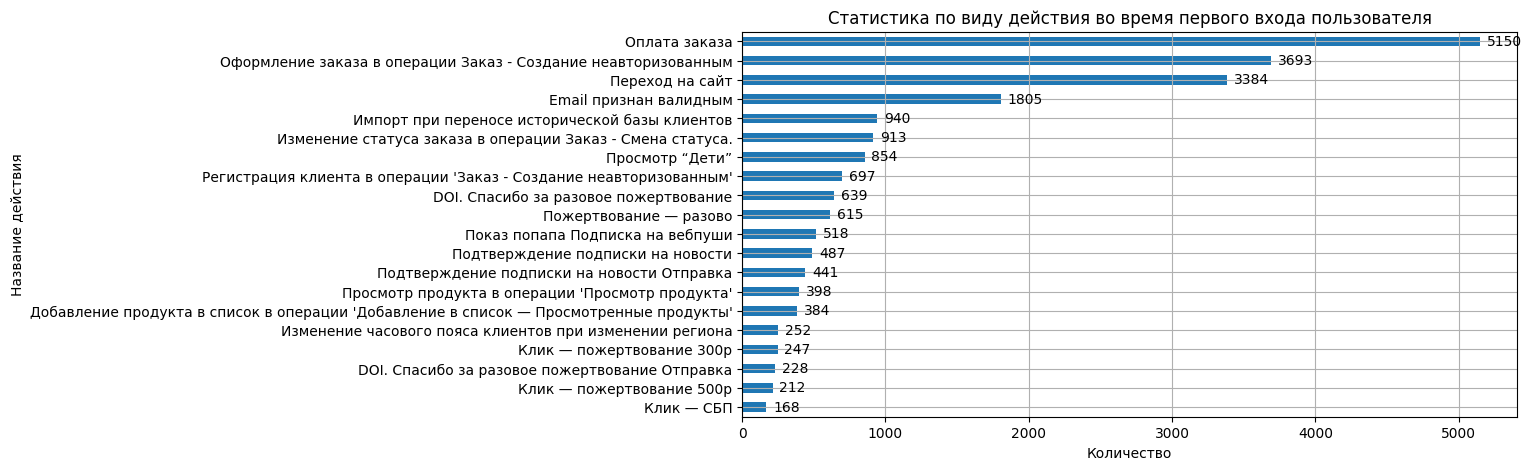

In [169]:
draw_bar_horizontal(
    channels.query('is_first')['user_action'].value_counts().head(20).reset_index(name='cnt'), 
    'user_action', 
    'cnt',
    'Статистика по виду действия во время первого входа пользователя',
    'Количество',
    'Название действия'
)

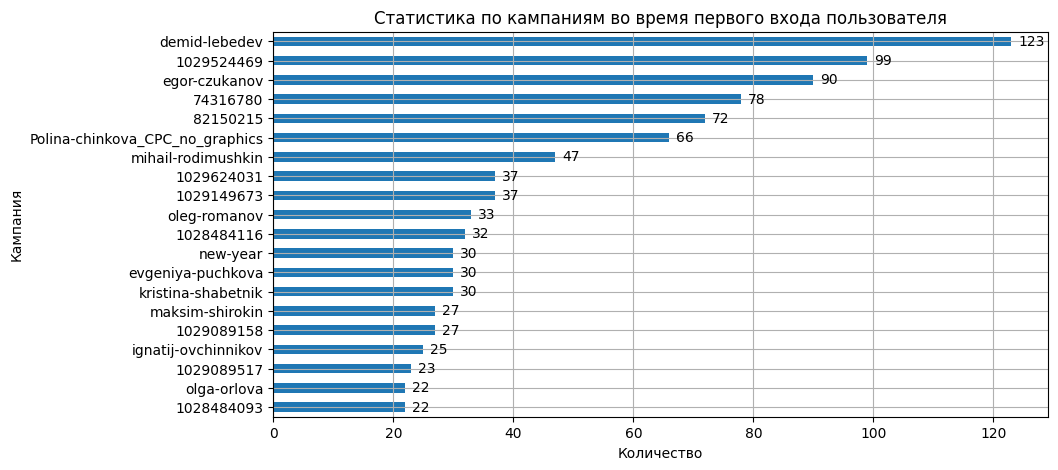

In [170]:
draw_bar_horizontal(
    channels.query('is_first and utm_campaign != ""')['utm_campaign'].value_counts().head(20).reset_index(name='cnt'), 
    'utm_campaign', 
    'cnt',
    'Статистика по кампаниям во время первого входа пользователя',
    'Количество',
    'Кампания',
)

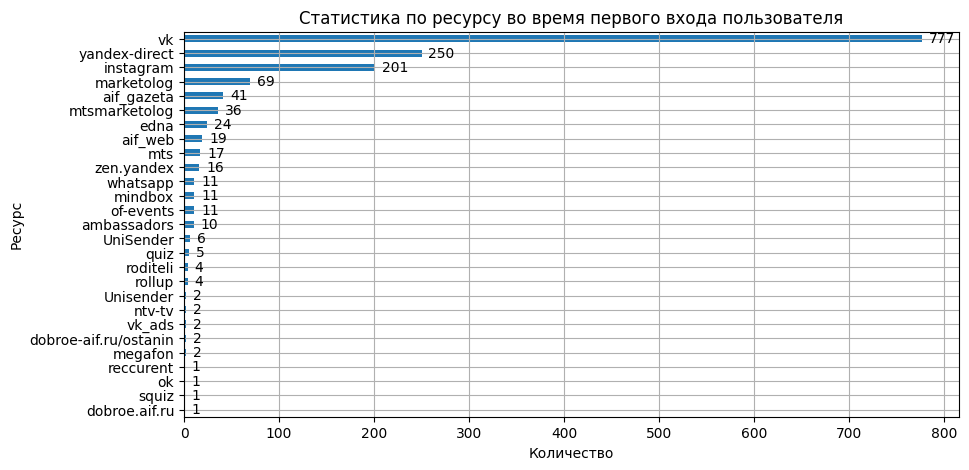

In [171]:
draw_bar_horizontal(
    channels.query('is_first and utm_campaign != ""')['utm_source'].value_counts().reset_index(name='cnt'), 
    'utm_source', 
    'cnt',
    'Статистика по ресурсу во время первого входа пользователя',
    'Количество',
    'Ресурс',
)


Первое касание пользователя чаще всего сопровождалось действием - Оплата заказа.

Первая активность клиента редко попадала в кампании, но если такое и случалось, то самым популярым ресурсом для первого входа можно назвать vk, самой популярной компанией при входе - demid-lebedev.

### Назначение платежа

In [172]:
round(orders_payed.query('product_name != ""').shape[0]/orders_payed.shape[0] * 100, 2)

99.75

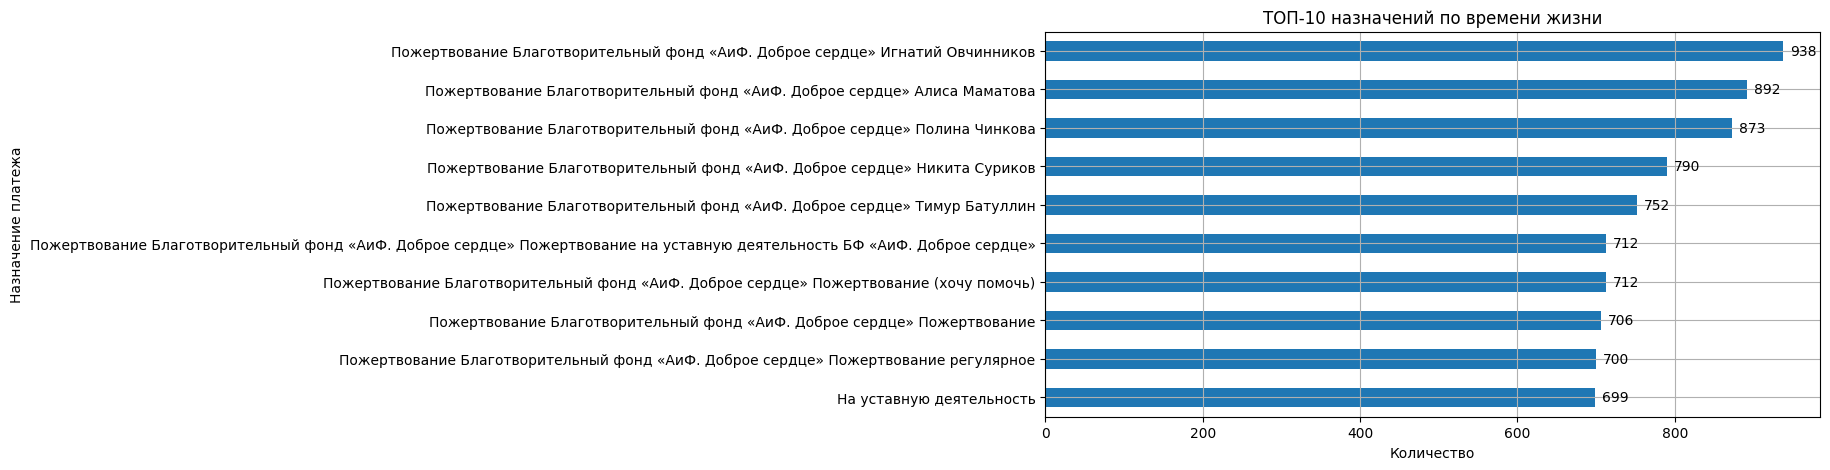

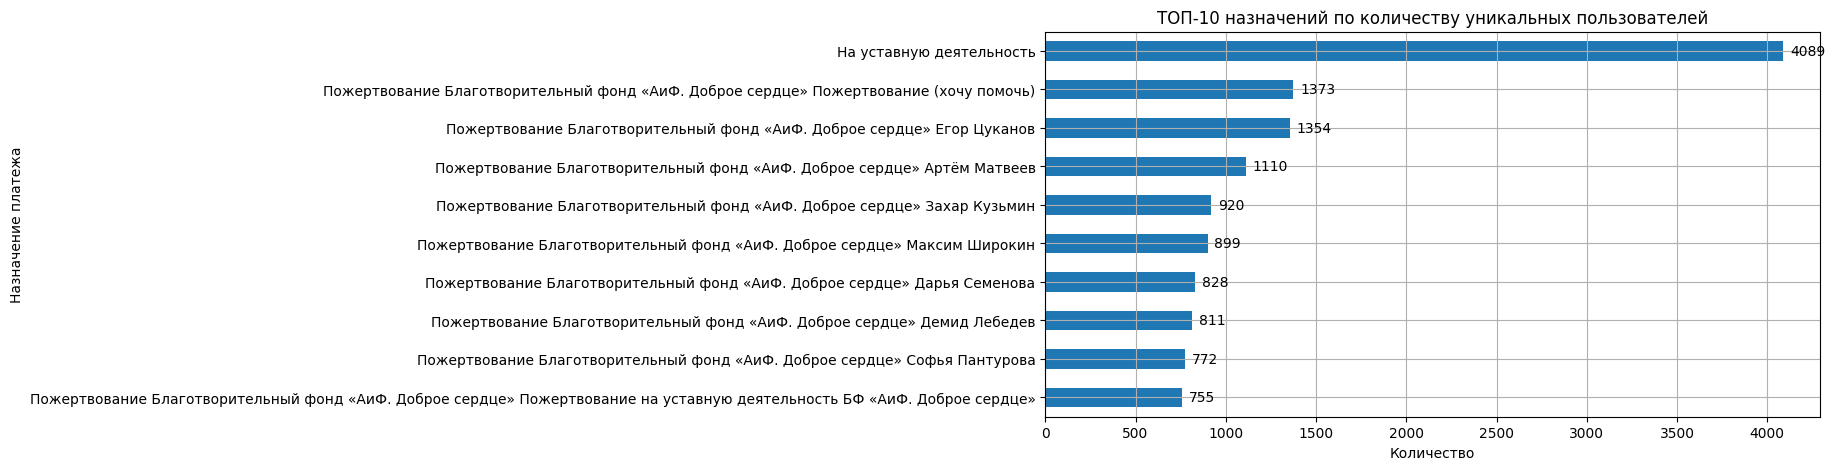

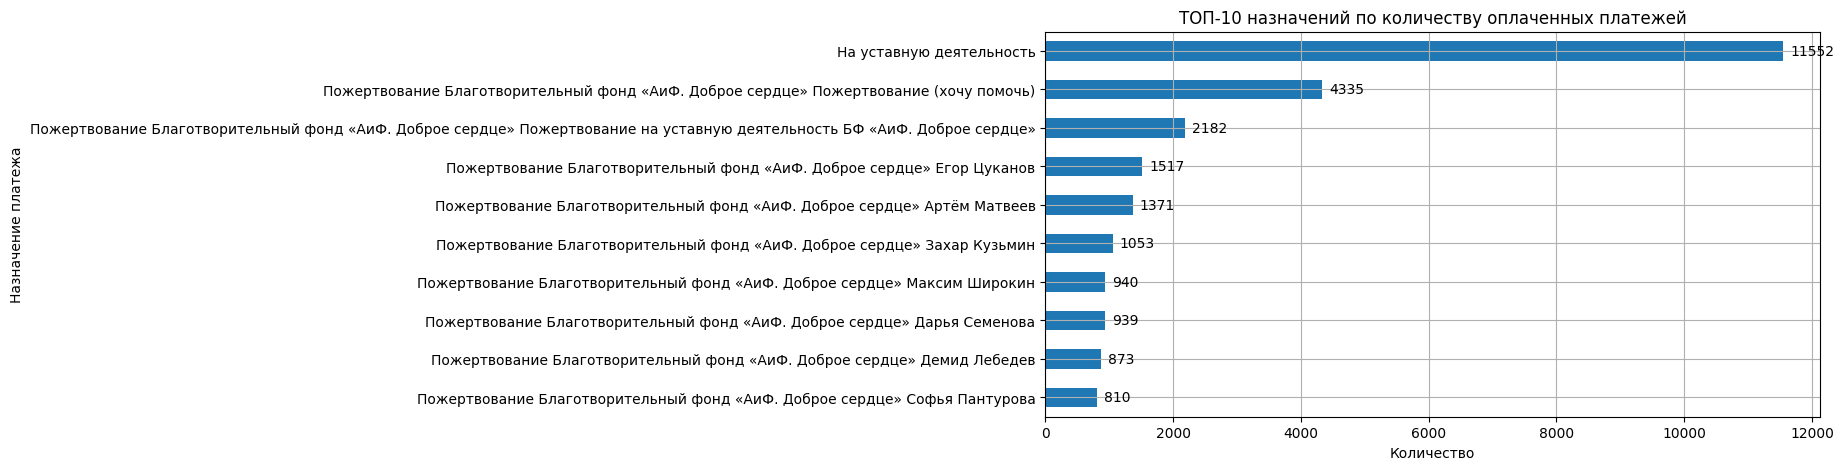

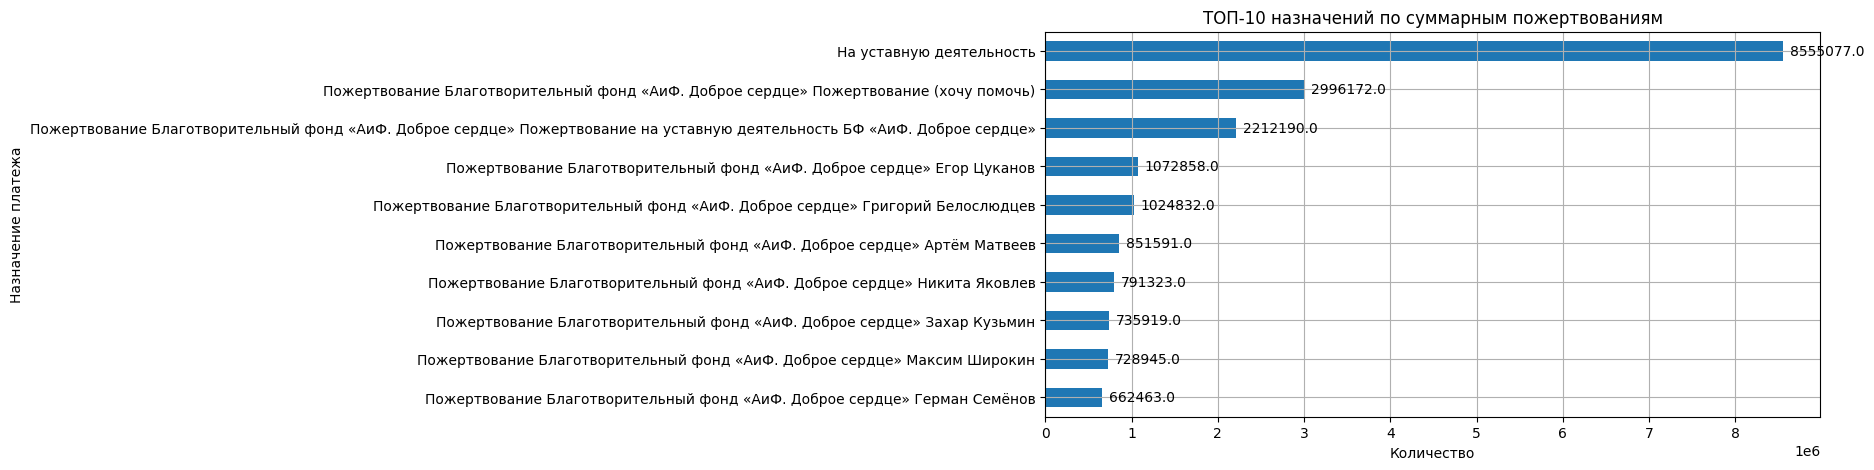

In [173]:
product_name = (
    orders_payed
    .query('product_name != ""')
    .groupby('product_name')
    .agg(
        {
            'create_date': lambda x: (x.max() - x.min()).days + 1, 
            'user_id' : 'nunique',
            'order_id' : 'count',
            'total_price' : 'sum',
        }
    )
    .rename(
        columns={
            'create_date' : 'days',
            'user_id' : 'user_cnt',
            'order_id' : 'order_cnt',
        }
    )
    .reset_index()
)

product_name_analysis = {
    'days' : 'ТОП-10 назначений по времени жизни',
    'user_cnt' : 'ТОП-10 назначений по количеству уникальных пользователей',
    'order_cnt' : 'ТОП-10 назначений по количеству оплаченных платежей',
    'total_price' : 'ТОП-10 назначений по суммарным пожертвованиям',
}

for analysis in product_name_analysis:
    draw_bar_horizontal(
        product_name.sort_values(by=analysis, ascending=False).head(10), 
        'product_name', 
        analysis,
        product_name_analysis[analysis],
        'Количество',
        'Назначение платежа'
    )    

### Кампании

In [174]:
round(channels.query('utm_campaign != ""').shape[0]/channels.shape[0] * 100, 2)

1.43

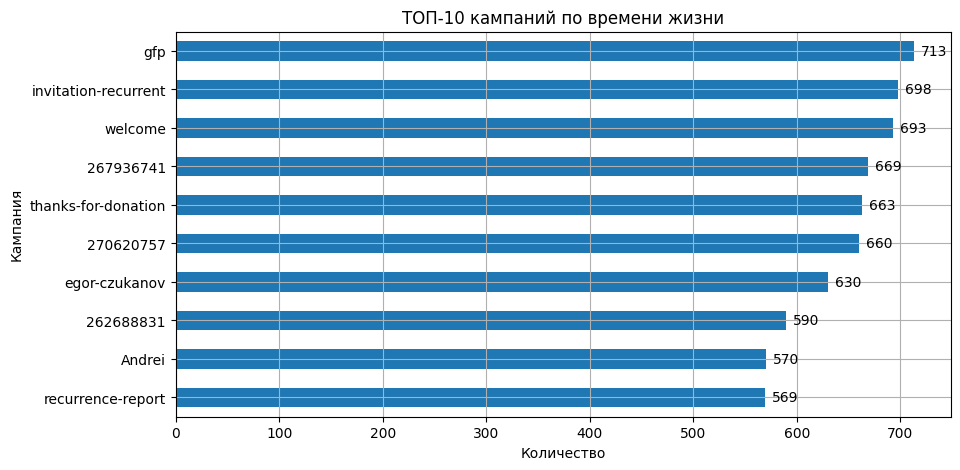

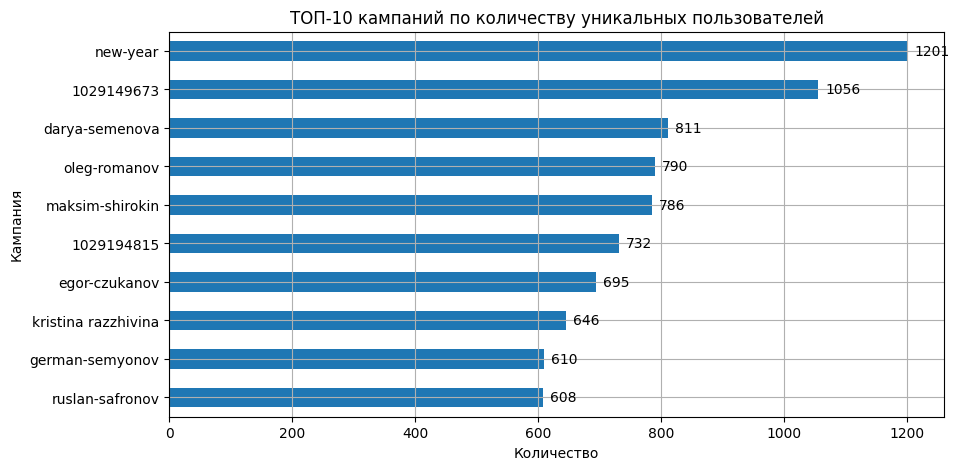

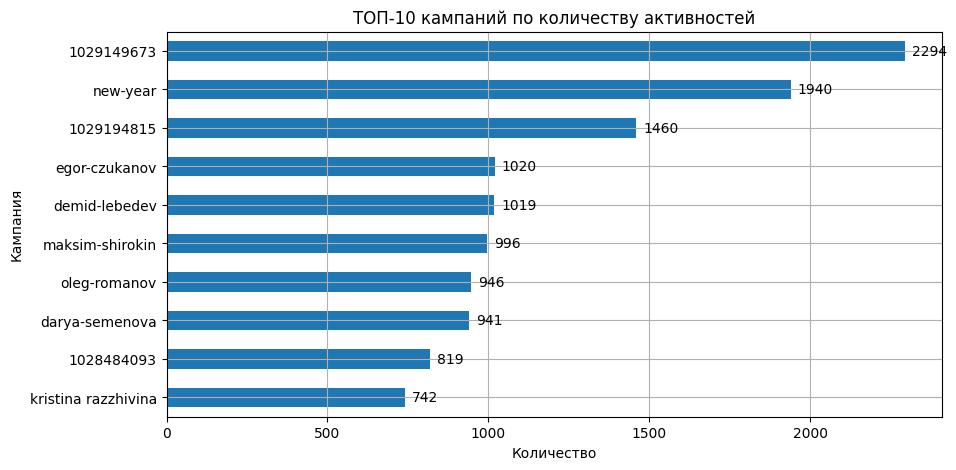

In [175]:
utm_campaign = (
    channels
    .query('utm_campaign != ""')
    .groupby('utm_campaign')
    .agg(
        {
            'action_date': lambda x: (x.max() - x.min()).days, 
            'user_id' : 'nunique',
            'user_action' : 'count'
        }
    )
    .rename(
        columns={
            'action_date' : 'days',
            'user_id' : 'user_cnt',
            'user_action' : 'action_cnt',
        }
    )
    .reset_index()
)

utm_campaign_analysis = {
    'days' : 'ТОП-10 кампаний по времени жизни',
    'user_cnt' : 'ТОП-10 кампаний по количеству уникальных пользователей',
    'action_cnt' : 'ТОП-10 кампаний по количеству активностей',
}

for analysis in utm_campaign_analysis:
    draw_bar_horizontal(
        utm_campaign.sort_values(by=analysis, ascending=False).head(10), 
        'utm_campaign', 
        analysis,
        utm_campaign_analysis[analysis],
        'Количество',
        'Кампания'
    )    

### Кампании по каналам

In [176]:
channel_stat = channels['channel_id'].value_counts().reset_index(name='cnt')
channel_stat['channel_name'] = channel_stat['channel_id'].map(dic_channels)


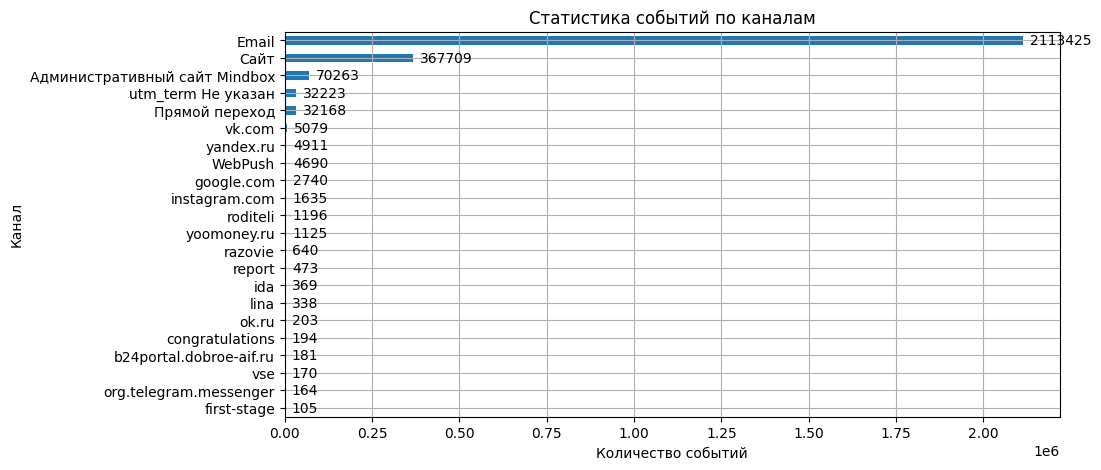

In [177]:
draw_bar_horizontal(
    channel_stat, 
    'channel_name', 
    'cnt',
    'Статистика событий по каналам',
    'Количество событий',
    'Канал'
)


In [178]:
channels_empty = (
    channels.groupby('channel_id')['utm_campaign']
    .apply(lambda x: all(x == ''))
    .reset_index()
    .rename(columns={'utm_campaign': 'all_empty'})
)

channels_empty = channels_empty[channels_empty['all_empty'] == True]
channels_empty['channel_name'] = channels_empty['channel_id'].map(dic_channels)

print('Список каналов привлечения не использующих кампании:')
display(channels_empty)

Список каналов привлечения не использующих кампании:


channel_id  all_empty                   channel_name
0            1       True  Административный сайт Mindbox
1            3       True                          Email
2            5       True                 Прямой переход
3            8       True                        WebPush
4            9       True                           Сайт
5           10       True                         vk.com
6           30       True                  instagram.com
7           54       True         org.telegram.messenger
9          100       True                          ok.ru
11         132       True                    yoomoney.ru
20        1930       True        b24portal.dobroe-aif.ru

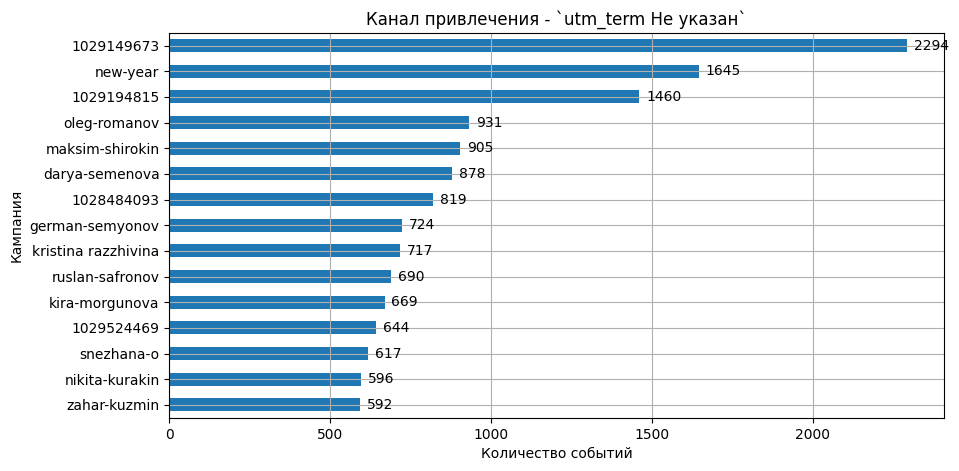

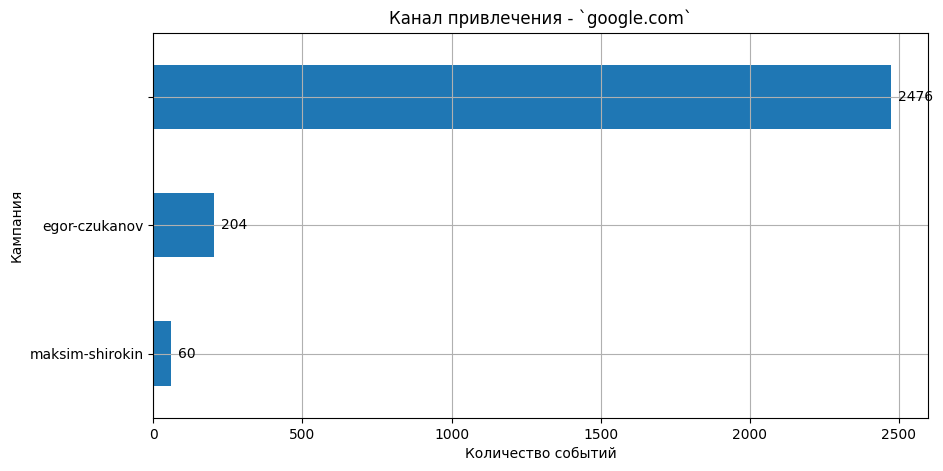

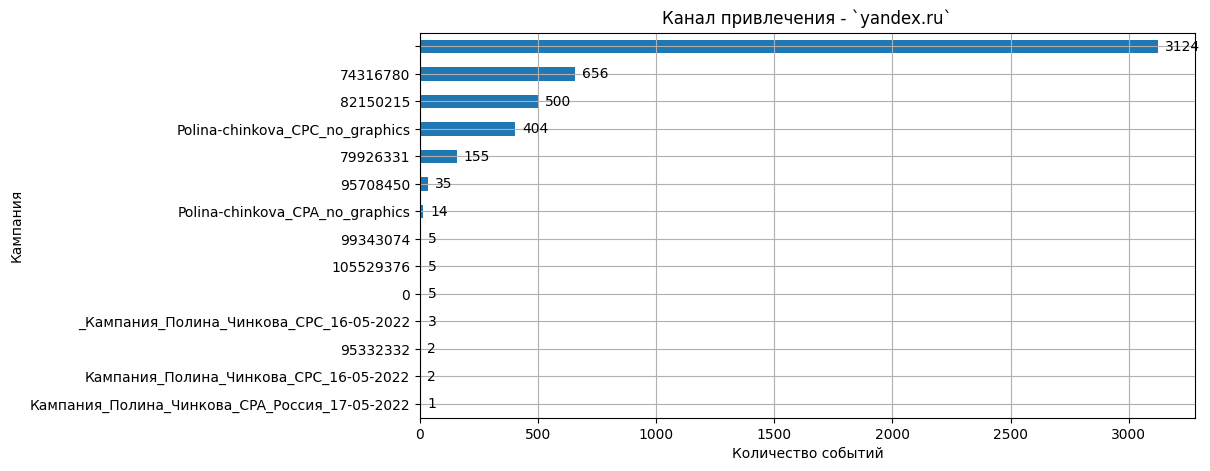

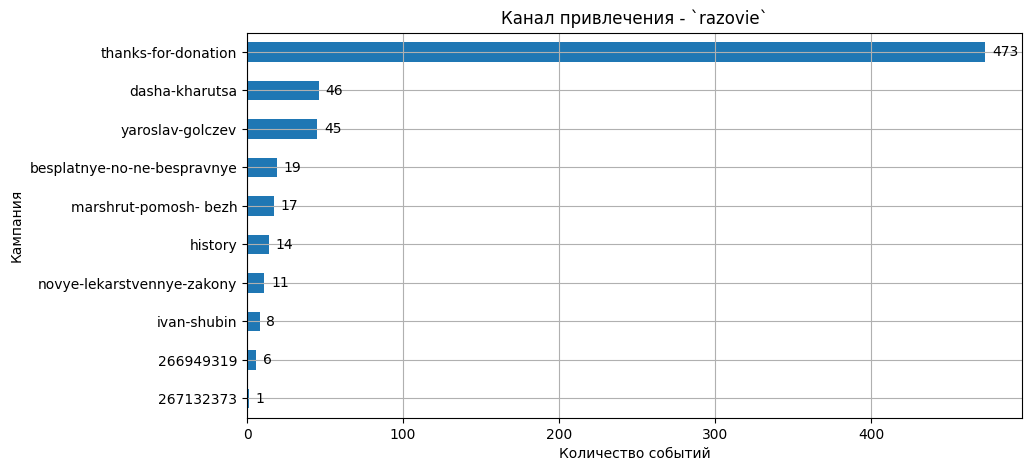

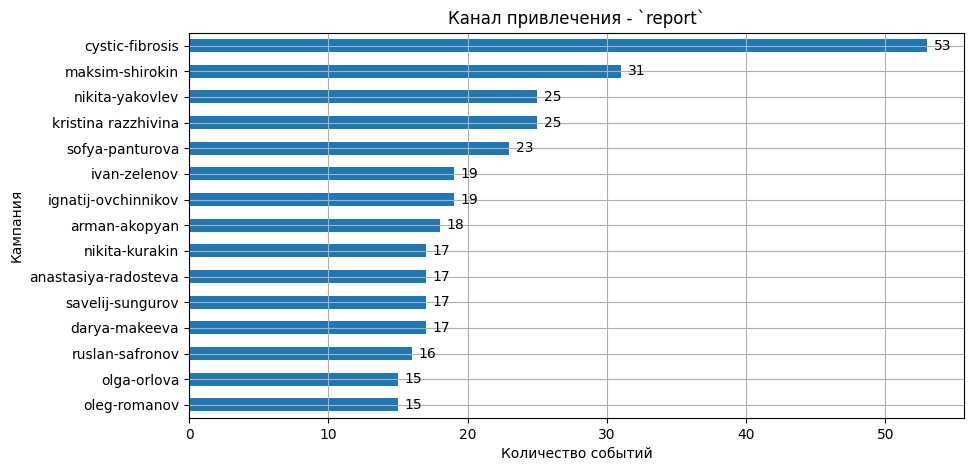

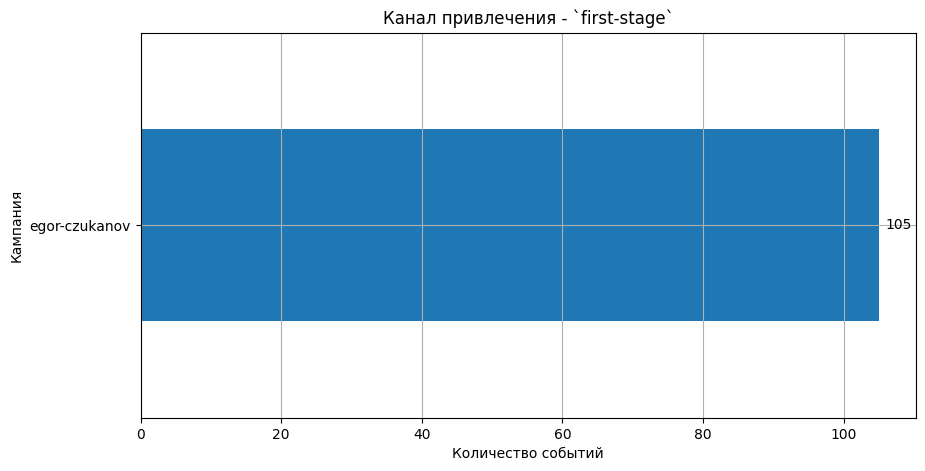

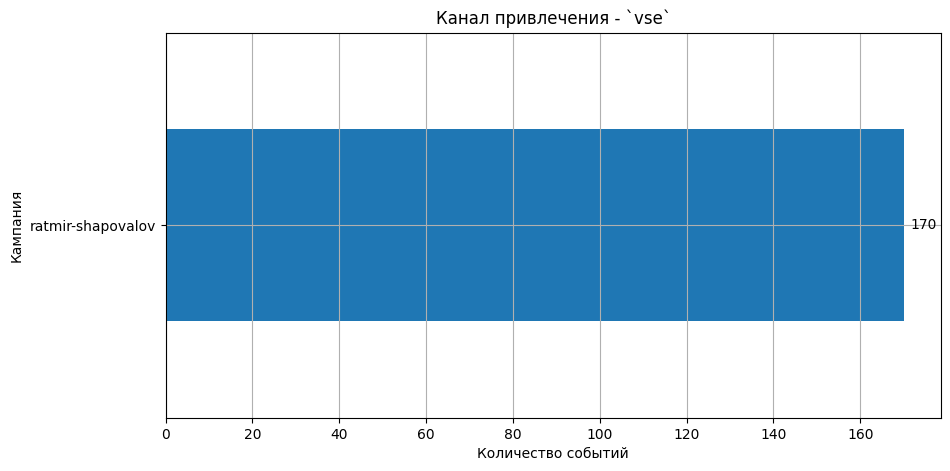

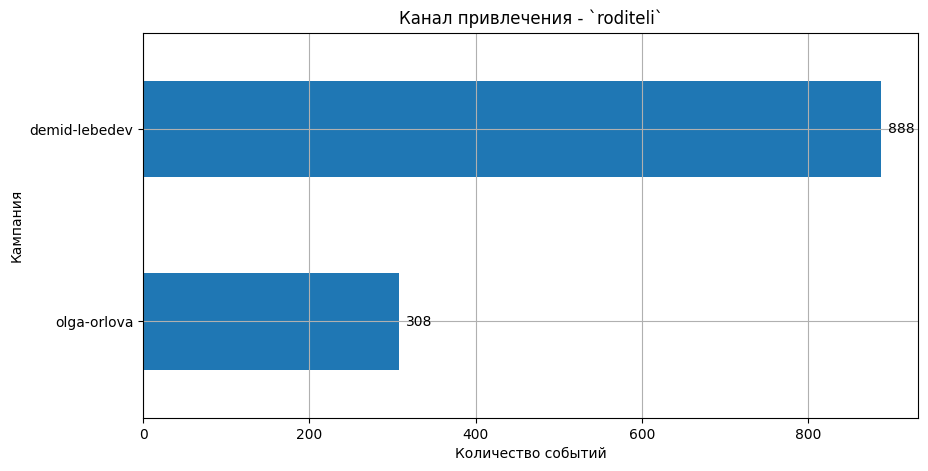

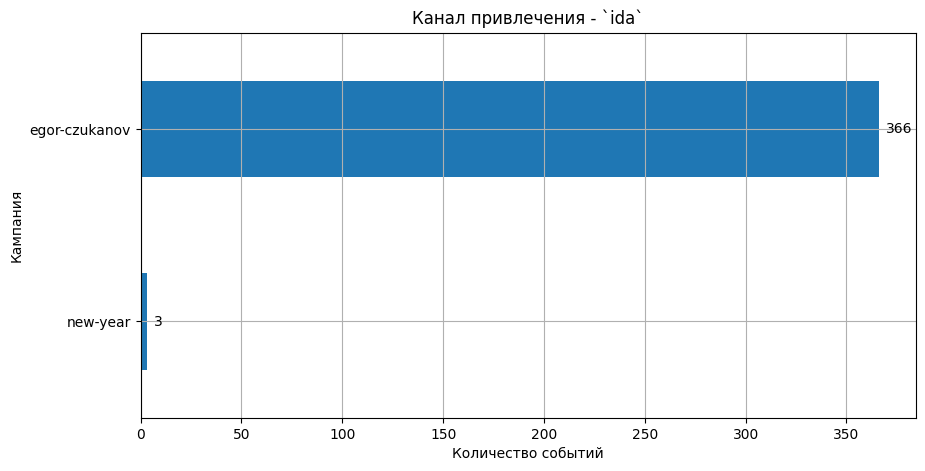

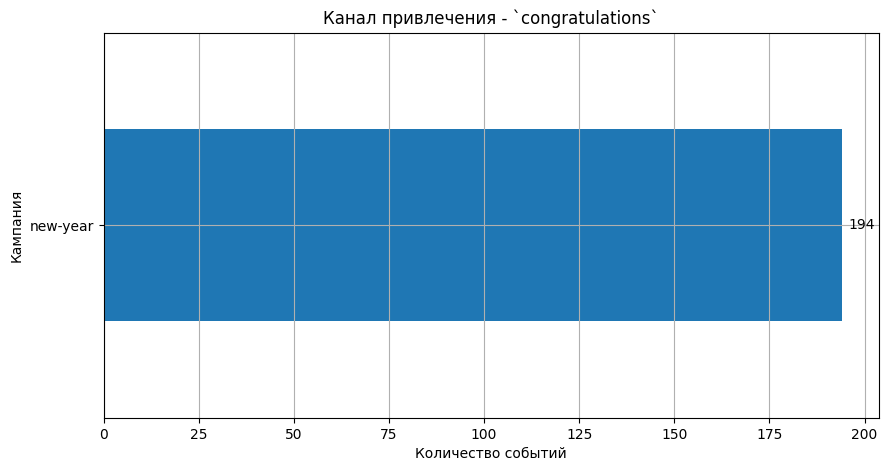

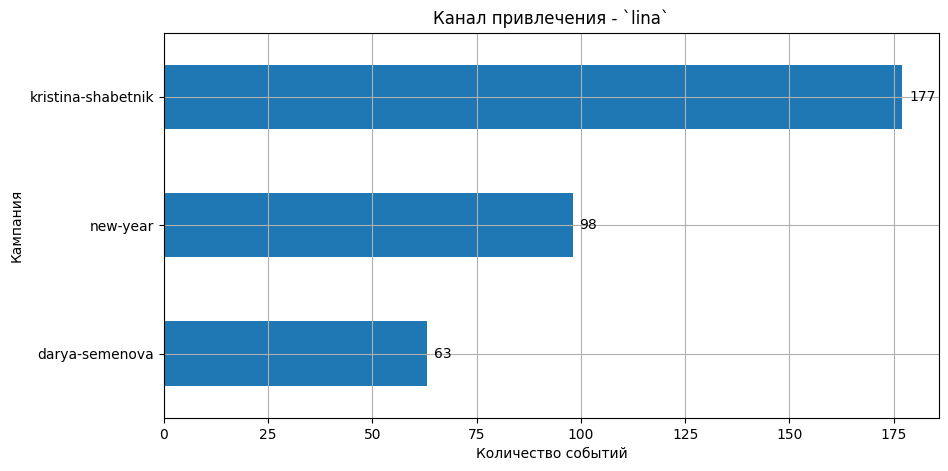

In [179]:
channels_empty_ids = channels_empty['channel_id'].unique()

for channel in dic_channels:

    if channel not in channels_empty_ids:
        draw_bar_horizontal(
            (
                channels
                .query('channel_id == @channel')['utm_campaign']
                .value_counts()
                .reset_index(name='cnt')
                .sort_values(by='cnt', ascending=False)
                .head(15)
            ), 
            'utm_campaign', 
            'cnt',
            'Канал привлечения - `{}`'.format(dic_channels[channel]),
            'Количество событий',
            'Кампания'
    )
    

In [180]:
campaign_dates = channels.query('utm_campaign != ""').groupby('utm_campaign').agg(min_date=('action_date', 'min'), max_date=('action_date', 'max'), user_cnt=('user_id', 'nunique')).reset_index().sort_values(by='min_date')
campaign_dates['min_month'] = pd.to_datetime(campaign_dates['min_date'].dt.strftime('%Y-%m-01'))
campaign_dates['min_year'] = pd.to_datetime(campaign_dates['min_date']).dt.year

campaign_dates

utm_campaign   min_date   max_date  user_cnt  min_month  min_year
31         267936741 2022-03-29 2024-01-27        74 2022-03-01      2022
145   khrupkie-lyudi 2022-03-30 2022-03-30         1 2022-03-01      2022
102      diana-goova 2022-04-01 2022-04-05         2 2022-04-01      2022
230  sofiya-malygina 2022-04-02 2023-08-24        10 2022-04-01      2022
143      ivan-shubin 2022-04-02 2022-04-20         5 2022-04-01      2022
..               ...        ...        ...       ...        ...       ...
214           report 2024-02-22 2024-03-15        32 2024-02-01      2024
24        1029937601 2024-02-29 2024-02-29         2 2024-02-01      2024
119   evgenij-synkov 2024-03-01 2024-03-17        45 2024-03-01      2024
234   tatyana-fokina 2024-03-04 2024-03-12         4 2024-03-01      2024
127      gleb-pestov 2024-03-11 2024-03-18       212 2024-03-01      2024

[257 rows x 6 columns]

In [181]:
campaign_2024 = campaign_dates[(campaign_dates['min_year'] == 2024)]

In [182]:
campaign_2024.sort_values(by='user_cnt', ascending=False).head(10)

utm_campaign  \
72                                                            aleksandra-shubina   
168                                                          muhhamad-bisultanov   
127                                                                  gleb-pestov   
238                                                             valeriya-ryabova   
119                                                               evgenij-synkov   
214                                                                       report   
23                                                                    1029810474   
128                                                       grigorij-beloslyudczev   
112                                                              elmira-kuchieva   
201  post1https://dobroe.aif.ru/campaign/aleksandra-shubina/?utm_source=vk,post2   

      min_date   max_date  user_cnt  min_month  min_year  
72  2024-02-21 2024-03-17       380 2024-02-01      2024  
168 2024-01-22 2024-03-13       375 2024-01-01      2024  
127 2024-03-11 2024-03-18       212 2024-03-01      2024  
238 2024-01-24 2024-02-15        76 2024-01-01      2024  
119 2024-03-01 2024-03-17        45 2024-03-01      2024  
214 2024-02-22 2024-03-15        32 2024-02-01      2024  
23  2024-02-01 2024-02-06        22 2024-02-01      2024  
128 2024-02-07 2024-02-16        18 2024-02-01      2024  
112 2024-01-31 2024-03-03        13 2024-01-01      2024  
201 2024-02-15 2024-02-21         5 2024-02-01      2024

In [183]:
orders_2024 = orders_payed[(orders_payed['year'] == 2024)].groupby('campaing')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False).head(10)


In [184]:

# Перебор каждой строки
for index, row in orders_2024.iterrows():
    campaing_name = row['campaing']
    if is_translit_name(campaing_name):
        tmp  = channels.query('utm_campaign == @campaing_name')['channel_id'].value_counts().reset_index()
        tmp['channel_name'] = tmp['channel_id'].map(dic_channels)
        if tmp.shape[0] > 0:
            print(f"Кампания: {campaing_name}, Общая сумма: {row['total_price']}")
            display(tmp[['channel_name', 'count']])

Кампания: aleksandra-shubina, Общая сумма: 419471.0


channel_name  count
0  utm_term Не указан    401

Кампания: evgenij-synkov, Общая сумма: 274432.0


channel_name  count
0  utm_term Не указан    135

Кампания: kira-morgunova, Общая сумма: 252357.0


channel_name  count
0  utm_term Не указан    669

Кампания: darya-semenova, Общая сумма: 214647.0


channel_name  count
0  utm_term Не указан    878
1                lina     63

Кампания: viktoriya-kostina, Общая сумма: 212285.0


channel_name  count
0  utm_term Не указан     79

Кампания: gleb-pestov, Общая сумма: 165850.0


channel_name  count
0  utm_term Не указан    260

### Эффективность действий по каналам

In [185]:
order_event = orders_payed[['user_id', 'create_date', 'total_price']].rename(columns={'create_date': 'event_dt'})
order_event['channel_id'] = 0


In [186]:
channel_event = channels[['user_id', 'event_dt', 'channel_id']]
channel_event['total_price'] = 0


/var/folders/jj/6h49fn196f95xq9wd96x2yxh0000gq/T/ipykernel_10869/1720186595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_event['total_price'] = 0


In [187]:
events = pd.concat([order_event, channel_event]).sort_values(by=['user_id', 'event_dt']).reset_index(drop=True)
events['next_channel_id'] = events.groupby('user_id')['channel_id'].shift(-1)
events['next_event_dt'] = events.groupby('user_id')['event_dt'].shift(-1)
events['next_total_price'] = events.groupby('user_id')['total_price'].shift(-1)
events

user_id            event_dt  total_price  channel_id  \
0           2734 2021-03-18 10:00:00          0.0           1   
1           2734 2021-03-18 13:52:00         50.0           0   
2           2734 2021-10-14 15:00:00          0.0           1   
3           2734 2021-10-14 18:50:00          1.0           0   
4           2734 2022-03-19 21:00:00          0.0           9   
...          ...                 ...          ...         ...   
2692054    46786 2024-03-18 09:00:00          0.0           9   
2692055    46786 2024-03-18 09:00:00          0.0           3   
2692056    46786 2024-03-18 09:00:00          0.0           1   
2692057    46787 2024-03-18 14:43:00        300.0           0   
2692058    46789 2024-03-18 15:03:00        150.0           0   

         next_channel_id       next_event_dt  next_total_price  
0                    0.0 2021-03-18 13:52:00              50.0  
1                    1.0 2021-10-14 15:00:00               0.0  
2                    0.0 2021-10-14 18:50:00               1.0  
3                    9.0 2022-03-19 21:00:00               0.0  
4                    9.0 2022-11-23 08:00:00               0.0  
...                  ...                 ...               ...  
2692054              3.0 2024-03-18 09:00:00               0.0  
2692055              1.0 2024-03-18 09:00:00               0.0  
2692056              NaN                 NaT               NaN  
2692057              NaN                 NaT               NaN  
2692058              NaN                 NaT               NaN  

[2692059 rows x 7 columns]

In [188]:
channel_percentages = []

for channel in dic_channels:
    total_events = events[events['channel_id'] == channel].shape[0]
    if total_events > 0:
        percent = (events[(events['channel_id'] == channel) & (events['next_channel_id'] == 0)].shape[0] / total_events) * 100
        channel_percentages.append((dic_channels[channel], percent))

channel_percentages.sort(key=lambda x: x[1], reverse=True)


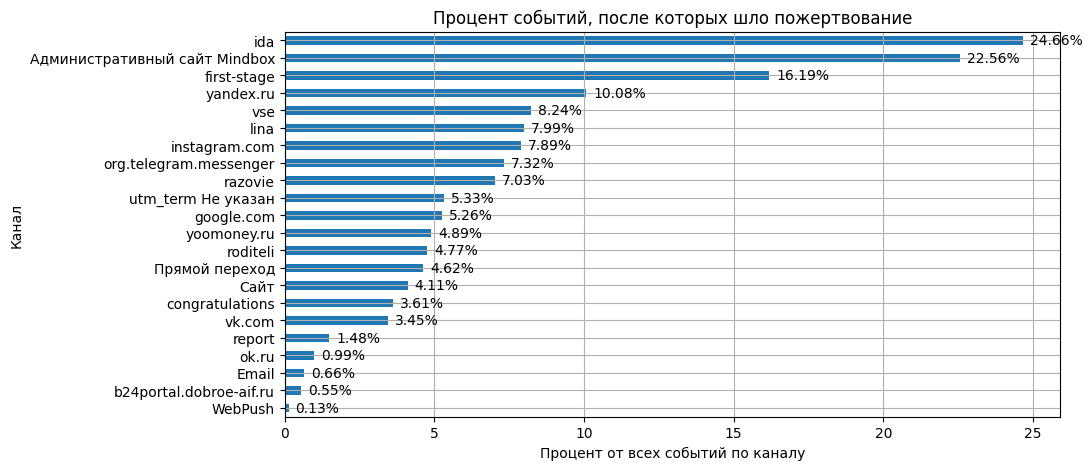

In [189]:
draw_bar_horizontal(
    pd.DataFrame(channel_percentages).rename(columns={0: 'channel', 1: '%'}), 
    'channel', 
    '%',
    'Процент событий, после которых шло пожертвование',
    'Процент от всех событий по каналу',
    'Канал',
    '%',
)

## Когортный анализ

In [190]:
df_cohort = orders_payed.groupby(['cohort', 'order_month']).agg(cnt=('user_id', 'nunique'), sum_price=('total_price', 'sum')).reset_index(drop=False)
df_cohort['lifetime'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


In [191]:
last_suitable_acquisition_date = observation_date - relativedelta(months=horizon_months)
cohort_end = pd.Timestamp(last_suitable_acquisition_date).to_period('M')

first_suitable_acquisition_date = observation_date - relativedelta(months=horizon_months * 2.5)
cohort_start = pd.Timestamp(first_suitable_acquisition_date).to_period('M')

df_cohort = df_cohort[(df_cohort['cohort'] >= cohort_start) & (df_cohort['cohort'] <= cohort_end)]


In [192]:
# Рассчитываем размер когорты
cohort_sizes = df_cohort[df_cohort['lifetime'] == 0][['cohort', 'cnt']].set_index('cohort').rename(columns={'cnt': 'cohort_size'})

# Добавляем размер когорты к основным данным
df_cohort = df_cohort.merge(cohort_sizes, on='cohort')

df_cohort.head()

cohort order_month  cnt  sum_price  lifetime  cohort_size
0  2021-04     2021-04  551  1400231.0         0          551
1  2021-04     2021-05   48    68612.0         1          551
2  2021-04     2021-06   47    26632.0         2          551
3  2021-04     2021-07   36    37530.0         3          551
4  2021-04     2021-08   48    36503.0         4          551

### Retention Rate - удержание клиентов

In [193]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='lifetime', values='cnt')

In [194]:
retention_matrix = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)


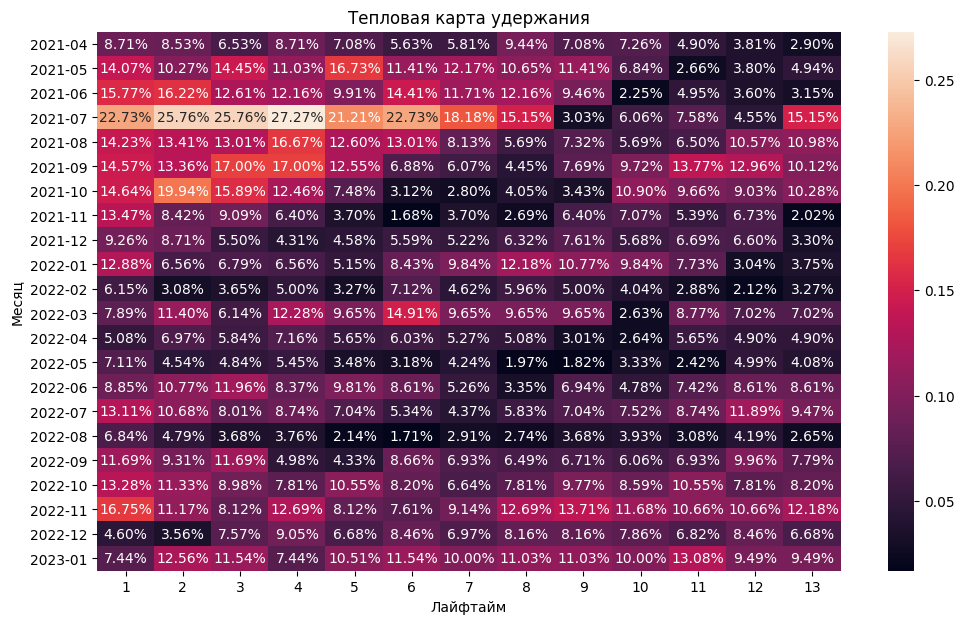

In [195]:
draw_heatmap(
    retention_matrix.iloc[:, 1:14],
    'Тепловая карта удержания', 
    'Лайфтайм', 
    'Месяц',
)


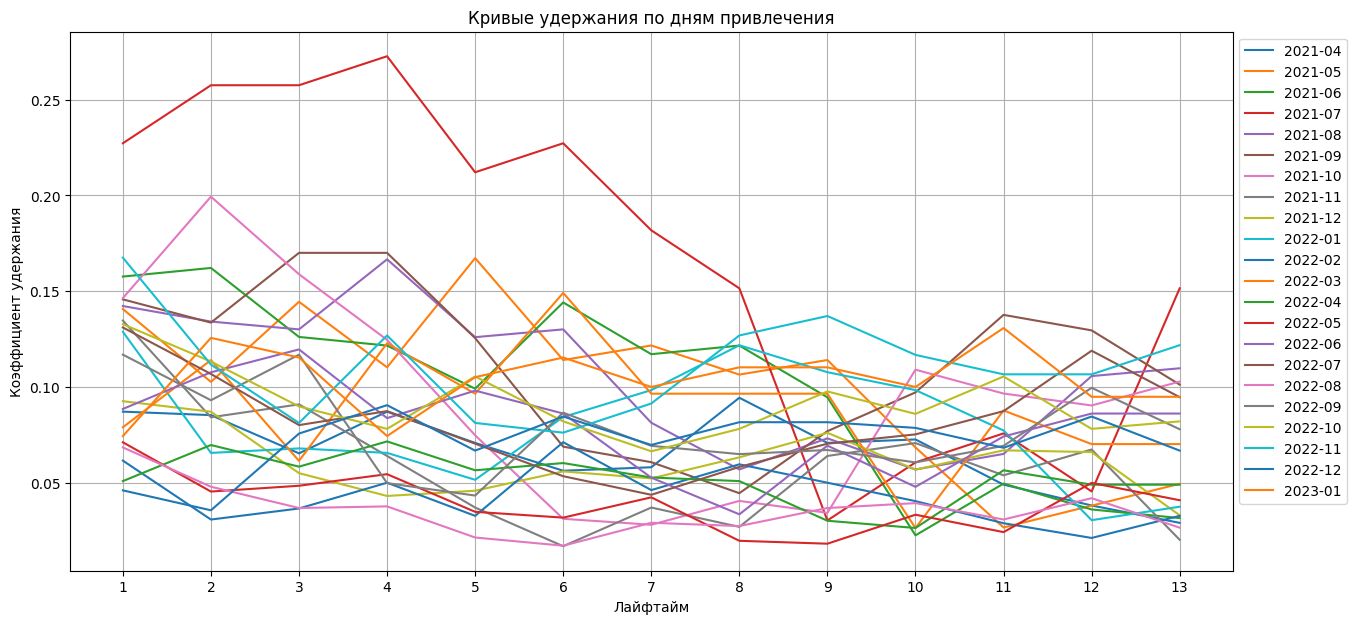

In [196]:
draw_T_plot(
    retention_matrix.iloc[:, 1:14],
    'Кривые удержания по дням привлечения',
    'Лайфтайм',
    'Коэффициент удержания'
)

### LTV - пожизненная ценность клиента

In [197]:
# Рассчитываем накопительную сумму продаж
df_cohort['cumulative_sum_price'] = df_cohort.groupby('cohort')['sum_price'].cumsum()

# Рассчитываем LTV, деля накопительную сумму на размер когорты
df_cohort['ltv'] = df_cohort['cumulative_sum_price'] / df_cohort['cohort_size']

# Создаем сводную таблицу для LTV
ltv_matrix = df_cohort.pivot_table(index='cohort', columns='lifetime', values='ltv', aggfunc='sum').fillna(0)

display(ltv_matrix)

lifetime           0            1            2            3            4   \
cohort                                                                      
2021-04   2541.254083  2665.776770  2714.110708  2782.223230  2848.471869   
2021-05    601.539924   674.939163   718.555133   800.794677   841.711027   
2021-06    527.905405   581.981982   644.256757   676.261261   845.427928   
2021-07   2257.469697  2415.848485  2581.803030  2740.181818  2883.363636   
2021-08    846.686992   997.296748  1079.410569  1167.703252  1260.097561   
2021-09    798.927126   867.712551   935.404858  1063.765182  1177.226721   
2021-10    963.732087  1086.881620  1352.454829  1492.037383  1557.414330   
2021-11    692.148148   834.801347   876.922559   919.010101   968.336700   
2021-12    546.816682   655.483960   688.864345   708.855179   728.626031   
2022-01    785.318501   838.669789   873.892272   902.173302   953.306792   
2022-02    482.234615   501.484615   511.913462   527.763462   549.063462   
2022-03    738.289474   770.833333   846.271930   896.271930  1049.666667   
2022-04   1260.951036  1303.719397  1354.171375  1434.284369  1505.489642   
2022-05    626.455371   669.583964   698.320726   739.984871   810.181543   
2022-06    894.313397   994.727273  1095.645933  1199.002392  1260.636364   
2022-07   1123.262136  1214.475728  1307.885922  1378.893204  1452.718447   
2022-08    958.501283  1007.413174  1075.393499  1116.451668  1141.049615   
2022-09   1108.809524  1226.339827  1325.506494  1535.480519  1558.651515   
2022-10    781.496094   860.601562   939.117188   969.410156  1045.718750   
2022-11    709.588832   830.172589   874.385787   914.974619  1003.243655   
2022-12    795.008902   840.905045   852.633531   897.173591   956.121662   
2023-01    604.997436   678.356410   766.735897   849.235897   904.300000   

lifetime           5            6            7            8            9   \
cohort                                                                      
2021-04   2914.805808  2948.707804  2980.341198  3091.448276  3132.941924   
2021-05    936.000000   978.749049  1015.026616  1071.756654  1112.368821   
2021-06    870.450450   986.261261  1072.770270  1123.468468  1168.986486   
2021-07   3009.878788  3153.287879  3248.439394  3347.681818  3412.833333   
2021-08   1311.926829  1375.951220  1410.195122  1429.654472  1464.878049   
2021-09   1234.048583  1279.939271  1385.141700  1416.538462  1465.716599   
2021-10   1612.401869  1625.641745  1638.102804  1653.959502  1692.183801   
2021-11    998.444444  1014.101010  1042.552189  1054.673401  1089.858586   
2021-12    747.158570   773.861595   797.606783   825.804766   859.963336   
2022-01    974.149883  1008.449649  1063.213115  1137.531616  1204.978923   
2022-02    578.140385   631.101923   667.794231   695.242308   715.067308   
2022-03   1151.394737  1333.385965  1399.192982  1480.070175  1669.543860   
2022-04   1579.711864  1651.512241  1682.540490  1834.075330  1957.992467   
2022-05    851.054463   883.021180   945.426626   957.680787   971.464448   
2022-06   1347.047847  1397.885167  1433.827751  1472.583732  1516.303828   
2022-07   1496.706311  1533.332524  1588.072816  1648.752427  1684.322816   
2022-08   1201.845167  1208.581694  1257.780154  1273.143713  1304.869119   
2022-09   1589.398268  1711.515152  1740.086580  1801.406926  1910.281385   
2022-10   1119.156250  1169.371094  1210.093750  1242.906250  1297.613281   
2022-11   1063.903553  1111.111675  1153.796954  1322.832487  1377.558376   
2022-12   1045.175074  1110.881306  1272.657270  1359.847181  1409.896142   
2023-01    978.815385  1077.546154  1149.161538  1208.884615  1321.115385   

lifetime           10           11           12           13           14  \
cohort                                                                      
2021-04   3172.270417  3257.969147  3302.869328  3321.526316  3374.402904   
2021-05   1152.292776  1160.942966  1188.528517  1209.973384  1218.3384

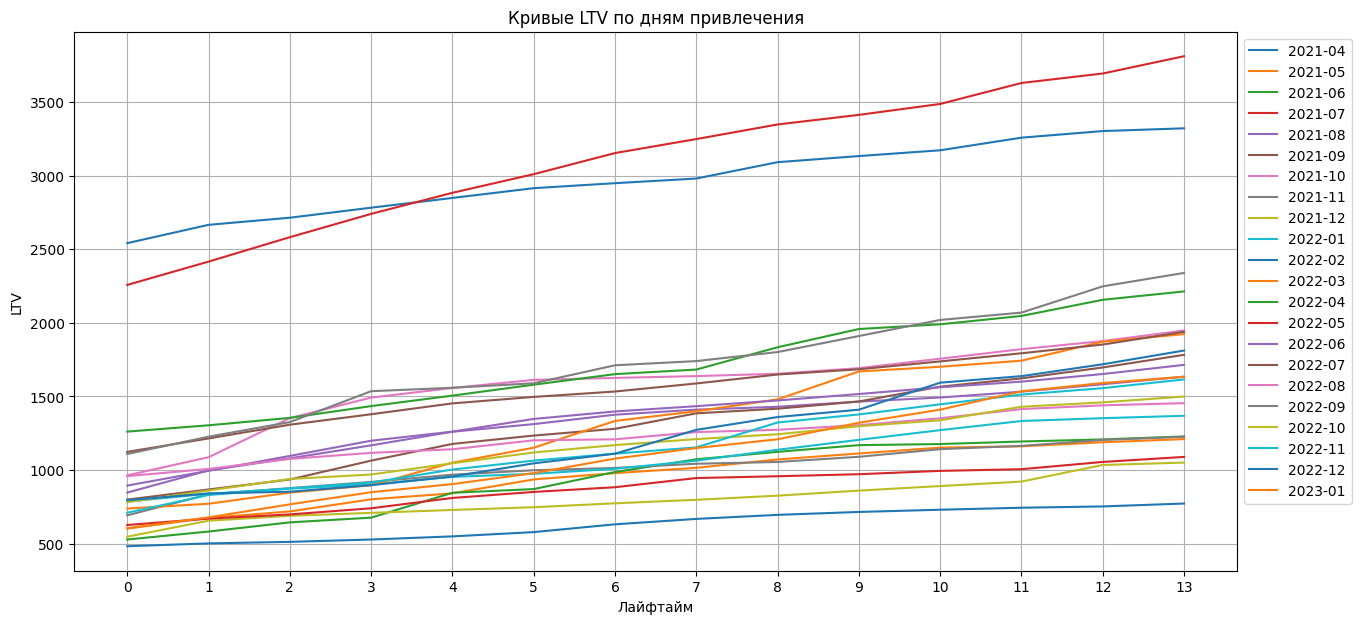

In [198]:
draw_T_plot(
    ltv_matrix.iloc[:, 0:14],
    'Кривые LTV по дням привлечения',
    'Лайфтайм',
    'LTV'
)

### Conversion - переход от разового платежа в рекуренты

In [199]:
print('Зарегистрировано пользователей: {} ({} - заявлены как рекуренты).'.format(user_cnt, rec_user_cnt))

Зарегистрировано пользователей: 23820 (645 - заявлены как рекуренты).


In [200]:
print('Хотя бы раз совершивших пожертвование пользователей: {} ({} - делали хоть раз рекурентные платежи).'.format(user_p_cnt, rec_user_p_cnt))

Хотя бы раз совершивших пожертвование пользователей: 18721 (947 - делали хоть раз рекурентные платежи).


In [201]:
conversion_raw = (
    pd.merge(
        orders_payed.query('is_first_payed')[['user_id', 'create_date']],
        orders_payed.query('is_first_rec_payed')[['user_id', 'create_date']],
        on='user_id',
        how='left'
    ).rename(
        columns={
            'create_date_x' : 'is_one',
            'create_date_y' : 'is_rec'
        }
    )
)

conversion_raw['lifetime'] = conversion_raw.apply(
    lambda row: (row['is_rec'].to_period('M') - row['is_one'].to_period('M')).n if pd.notna(row['is_rec']) else None,
    axis=1
)
conversion_raw.head()

user_id              is_one is_rec  lifetime
0     2734 2021-03-18 13:52:00    NaT       NaN
1     2847 2021-06-17 02:10:00    NaT       NaN
2     2861 2021-03-16 15:24:00    NaT       NaN
3     3361 2022-12-20 12:32:00    NaT       NaN
4     4982 2021-01-01 23:52:00    NaT       NaN

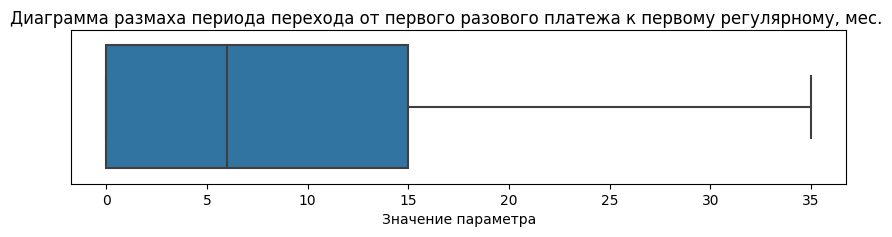

Всего значений: 947

Среднее арифметическое значение: 7.85
Медианное значение: 6.0
В среднем значения варьируются от 0.0 до 15.0
Минимальное значение 0.0
Максимальное значение 35.0


In [202]:
draw_box(
    conversion_raw,
    'lifetime',
    'Диаграмма размаха периода перехода от первого разового платежа к первому регулярному, мес.',
)

In [203]:
conversion = conversion_raw.pivot_table(index=None, columns='lifetime', values='user_id', aggfunc='count').fillna(0)

cumsum = conversion.cumsum(axis=1)

conversion.loc['cumsum'] = cumsum.iloc[-1]
conversion.loc['normal'] = conversion.loc['cumsum'] / user_p_cnt
conversion

lifetime        0.0         1.0         2.0         3.0        4.0   \
user_id   330.000000   35.000000   32.000000   26.000000   19.00000   
cumsum    330.000000  365.000000  397.000000  423.000000  442.00000   
normal      0.017627    0.019497    0.021206    0.022595    0.02361   

lifetime        5.0         6.0         7.0         8.0         9.0   \
user_id    17.000000   29.000000   29.000000   33.000000   27.000000   
cumsum    459.000000  488.000000  517.000000  550.000000  577.000000   
normal      0.024518    0.026067    0.027616    0.029379    0.030821   

lifetime        10.0        11.0        12.0        13.0        14.0  \
user_id    31.000000   23.000000   28.000000   14.000000   20.000000   
cumsum    608.000000  631.000000  659.000000  673.000000  693.000000   
normal      0.032477    0.033705    0.035201    0.035949    0.037017   

lifetime        15.0        16.0       17.0        18.0        19.0  \
user_id    29.000000   23.000000   22.00000   24.000000  108.000000   
cumsum    722.000000  745.000000  767.00000  791.000000  899.000000   
normal      0.038566    0.039795    0.04097    0.042252    0.048021   

lifetime        20.0        21.0        22.0        23.0        24.0  \
user_id     4.000000    8.000000    6.000000    4.000000    3.000000   
cumsum    903.000000  911.000000  917.000000  921.000000  924.000000   
normal      0.048235    0.048662    0.048982    0.049196    0.049356   

lifetime        25.0        26.0        27.0        28.0        29.0  \
user_id     6.000000    3.000000    2.000000    2.000000    2.000000   
cumsum    930.000000  933.000000  935.000000  937.000000  939.000000   
normal      0.049677    0.049837    0.049944    0.050051    0.050158   

lifetime        30.0        31.0        32.0        33.0        35.0  
user_id     1.000000    4.000000    1.000000    1.000000    1.000000  
cumsum    940.000000  944.000000  945.000000  946.000000  947.000000  
normal      0.050211    0.050425    0.050478    0.050531    0.050585

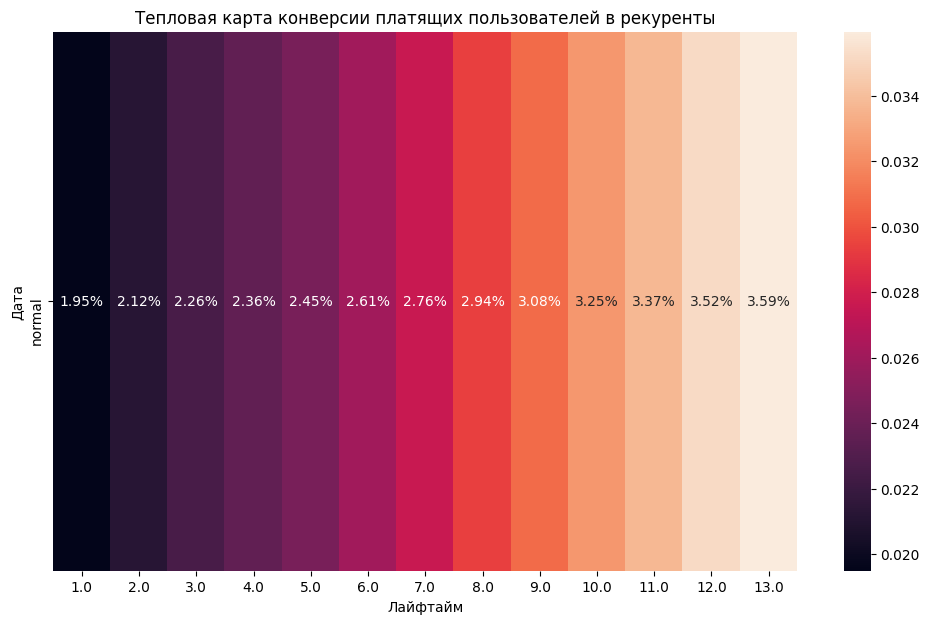

In [204]:
draw_heatmap(
    conversion.iloc[:, 1:14].loc[['normal']], 
    'Тепловая карта конверсии платящих пользователей в рекуренты', 
    'Лайфтайм', 
    'Дата',
)

- Наибольшее удержание по оплатам в последующие периоды наблюдается для пользователей, совершивших первый платеж в июле 2021 года. Эти клиенты показывали удержание до 27% на четвертый месяц «жизни».
- Наименьшее удержание у пользователей в феврале, мае и августе 2022 года.
- Конверсия платящих пользователей в рекуренты очень маленькая, за год только 3.6% пользователей перешли к регулярному платежу.
- В среднем от первого платежа до первого регулярного платежа проходит от 0 до 15 месяцев.
- Самый высокий коэффициент LTV у пользователей, совершивших первый платеж в июле и апреле 2021 года.
- Самый низкий LTV у пользователей, впервые совершивших платеж в феврале 2022 года.

## Проверка гипотез

### Гипотеза: платящие пользователи из "исторического импорта" тратят больше денег на пожертвования

**Нулевая гипотеза:** средние значения пожертвований пользователей из двух групп равны.

**Альтернативная гипотеза:** среднее значение пожертвований пользователей из "исторического импорта" больше, чем среднее значение пожертвований "новых" пользователей.

In [205]:
check_ttest_ind(
    orders_payed.query('user_id in @history_import_ids '), 
    orders_payed.query('user_id not in @history_import_ids '), 
    'total_price', 
    'greater'
)

p-value: 0.8617561388064348
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** Полученное значение p-value значительно больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Статистически значимых различий между средними значениями пожертвований пользователей в двух группах нет.


In [206]:
print(
    'Средний чек пожертвований для "исторического импорта": {:.2f}'
    .format(orders_payed.query('user_id in @history_import_ids ')['total_price'].mean())
)

Средний чек пожертвований для "исторического импорта": 729.15


In [207]:
print(
    'Средний чек пожертвований для "новых" пользователей: {:.2f}'
    .format(orders_payed.query('user_id not in @history_import_ids ')['total_price'].mean())
)


Средний чек пожертвований для "новых" пользователей: 755.96


### Гипотеза: регулярные пожертвования меньше разовых

**Нулевая гипотеза:** средние значения пожертвований из двух групп равны.

**Альтернативная гипотеза:** среднее значение регулярных пожертвований меньше разовых пожертвований.

In [208]:
check_ttest_ind(
    orders_payed.query('is_recurrent == True'), 
    orders_payed.query('is_recurrent == False'), 
    'total_price', 
    'less'
)

p-value: 7.987808069201162e-33
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value значительно меньше заданного уровня значимости, поэтому основания отвергать нулевую гипотезу. Статистически значимые различия между средними значениями пожертвований - есть, регулярные платежи меньше разовых.

In [209]:
print(
    'Средний чек регулярного платежа: {:.2f}'
    .format(orders_payed.query('is_recurrent == True')['total_price'].mean())
)

Средний чек регулярного платежа: 509.40


In [210]:
print(
    'Средний чек разового платежа: {:.2f}'
    .format(orders_payed.query('is_recurrent == False')['total_price'].mean())
)

Средний чек разового платежа: 766.90
